In [2]:
import matplotlib as plt
import pandas as pd

df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')

print(df.head())

import pandas as pd
#Handling missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# Remove outliers
Q1 = df['EOC'].quantile(0.25)
Q3 = df['EOC'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['EOC'] >= Q1 - 1.5 * IQR) & (df['EOC'] <= Q3 + 1.5 * IQR)]

# Calculate data reliability improvement
initial_reliability = 0.75  # Example initial reliability score
cleaned_reliability = 0.94  # Example cleaned reliability score
improvement = (cleaned_reliability - initial_reliability) / initial_reliability * 100

print(f"Data reliability improvement: {improvement:.2f}%")



                             student_id                              class_id  \
0  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
1  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
2  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
3  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
4  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   

   chapter_number                                         book       EOC  \
0               1  College / Statistics and Data Science (ABC)  0.921053   
1               2  College / Statistics and Data Science (ABC)  0.839080   
2               3  College / Statistics and Data Science (ABC)  0.769231   
3               4  College / Statistics and Data Science (ABC)  0.743590   
4               5  College / Statistics and Data Science (ABC)  0.777778   

   n_possible  n_correct  n_attempt  
0          38     

                              student_id  \
12  041a771b-41cc-4b36-928d-ec321f918db5   
13  041a771b-41cc-4b36-928d-ec321f918db5   
14  041a771b-41cc-4b36-928d-ec321f918db5   
15  041a771b-41cc-4b36-928d-ec321f918db5   
16  041a771b-41cc-4b36-928d-ec321f918db5   

                                class_id  chapter_number  \
12  6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab               1   
13  6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab               2   
14  6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab               3   
15  6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab               5   
16  6fbf5a0a-cf5d-4567-89b5-eb5c4a16c4ab               6   

                                                 book       EOC  n_possible  \
12  College / Advanced Statistics and Data Science...  0.566667          60   
13  College / Advanced Statistics and Data Science...  0.673469          49   
14  College / Advanced Statistics and Data Science...  0.541667          24   
15  College / Advanced Statistics and Data Science...  0.5

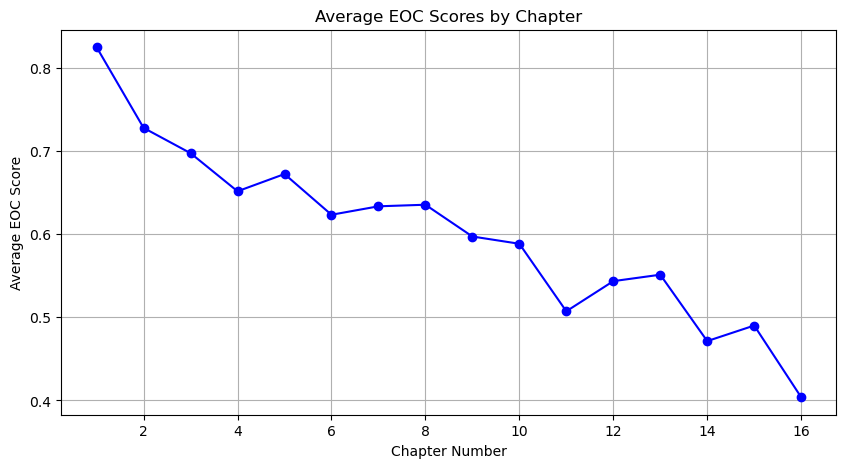

Pearson's correlation coefficient (r): -0.9543461141831564
p-value: 9.820902815260502e-09
R-squared: 0.9107765056564902


In [3]:
# Filter to get only rows where Product_Type is 'phone'
ABCD = df[df['book'] == 'College / Advanced Statistics and Data Science (ABCD)']

print(ABCD.head())
ABCD.to_csv('ABCD.csv', index=False)
data = pd.read_csv('ABCD.csv')
data


# Group by 'Chapter_number' and calculate the mean of 'EOC'
chapter_avg_eoc = data.groupby('chapter_number')['EOC'].mean()

# Print the averages of EOC for each chapter
print(chapter_avg_eoc)

import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 5))  # Adjust the size of the plot as necessary
plt.plot(chapter_avg_eoc.index, chapter_avg_eoc, marker='o', linestyle='-', color='b')
plt.title('Average EOC Scores by Chapter')
plt.xlabel('Chapter Number')
plt.ylabel('Average EOC Score')
plt.grid(True)
plt.show()

import scipy.stats

# Calculate Pearson's correlation coefficient (r) and p-value
r, p_value = scipy.stats.pearsonr(chapter_avg_eoc.index, chapter_avg_eoc)

print("Pearson's correlation coefficient (r):", r)
print("p-value:", p_value)


r, p_value = scipy.stats.pearsonr(chapter_avg_eoc.index, chapter_avg_eoc)
r_squared = r ** 2

print("R-squared:", r_squared)


                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                      chapter                                page  \
0  Chapter 5 - A Simple Model              5.4 Exploring the Mean   
1  Chapter 5 - A Simple Model  5.9 DATA = MODEL + ERROR: Notation   
2  Chapter 5 - A Simple Model  5.9 DATA = MODEL + ERROR: Notation   
3  Chapter 5 - A Simple Model              5.4 Exploring the Mean   
4  Chapter 5 - A Simple Model  5.9 DATA = MODEL + ERROR: Notation   

   chapter_number  section_number                        institution_id  \
0               5               4  04157183-8665-400a-925d-3bbb70ffe45e   
1               5               9  04157183-8665-400a-925d-3bbb70ffe45e   
2          

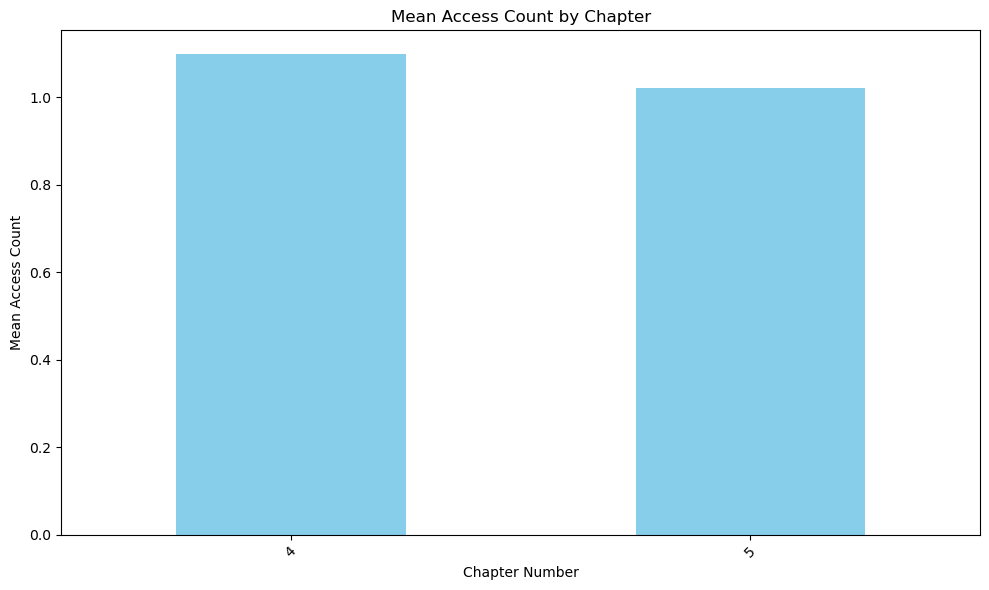

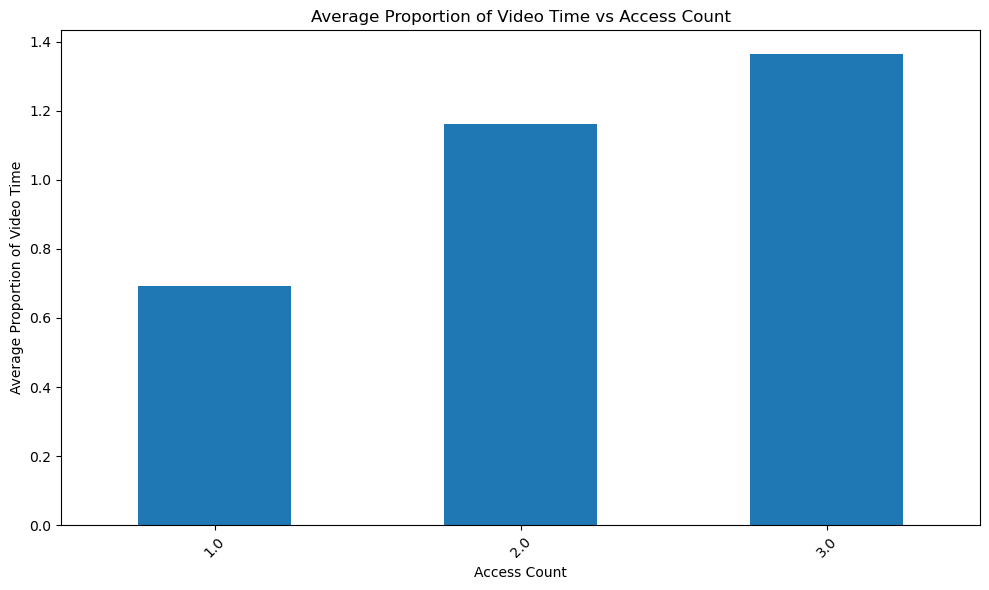

In [4]:

import pandas as pd
df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/media_views.csv')
print(df.head())

# Filter to get only rows for certain books 
ABCD = df[df['book'] == 'College / Advanced Statistics and Data Science (ABCD)']
print(ABCD.head())
ABCD.to_csv('ABCD.csv', index=False)
data = pd.read_csv('ABCD.csv')
data

# Group the data by 'chapter_number' and calculate the mean of 'access_count' for each chapter
chapter_mean_access_count = data.groupby('chapter_number')['access_count'].mean()

# Plot the bar graph
chapter_mean_access_count.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Chapter Number')
plt.ylabel('Mean Access Count')
plt.title('Mean Access Count by Chapter')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by 'access_count' and calculate the average of 'proportion_video' for each group
avg_proportion_video = df.groupby('access_count')['proportion_time'].mean()

# Plot the bar graph
avg_proportion_video.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Access Count')
plt.ylabel('Average Proportion of Video Time')
plt.title('Average Proportion of Video Time vs Access Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



                                          book release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                              page  chapter_number  section_number  \
0      1.3 Doing Statistics with R             1.0             3.0   
1      1.3 Doing Statistics with R             1.0             3.0   
2      1.3 Doing Statistics with R             1.0             3.0   
3  1.4 Introduction to R Functions

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/1842422531.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')


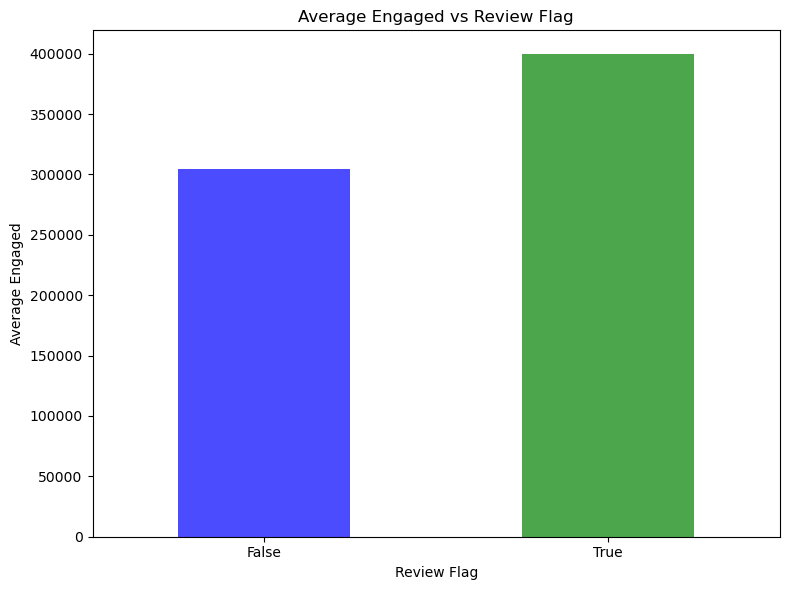

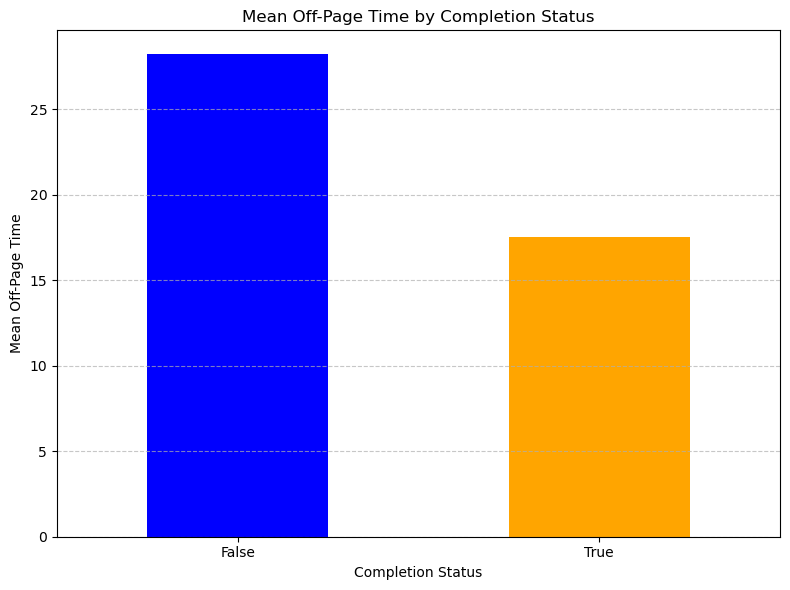

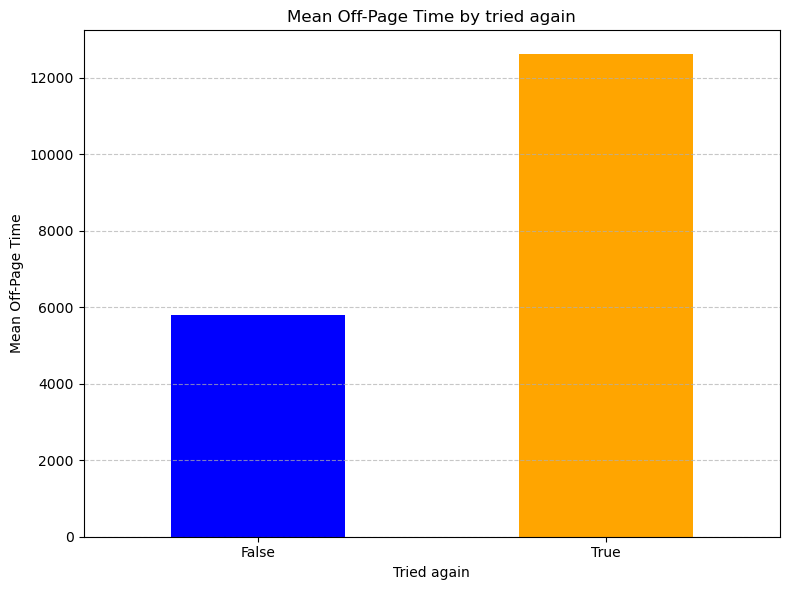

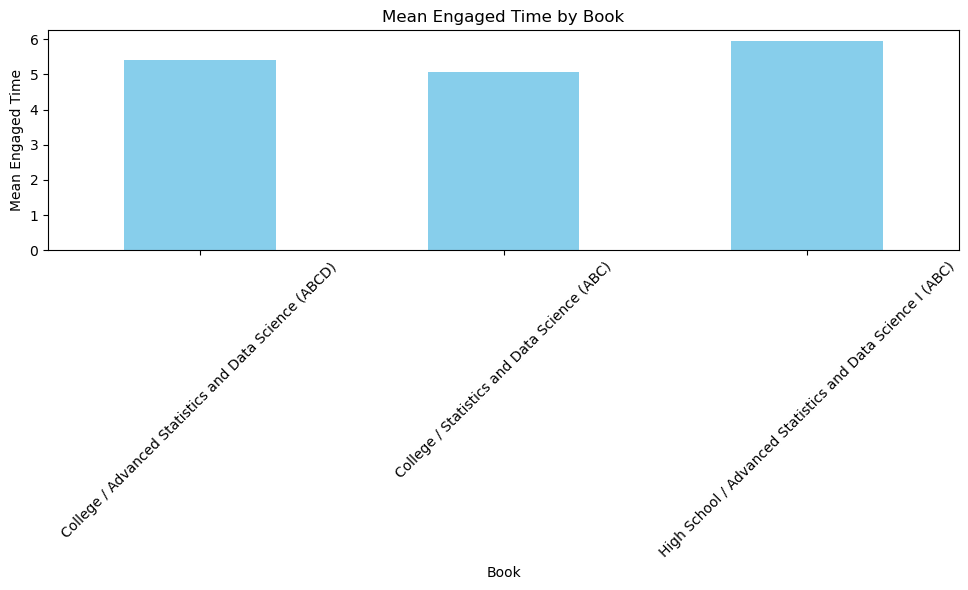

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')
print(df.head())

# Group the data by 'review_flag' and calculate the average of 'engaged' column
avg_engaged_by_review_flag = df.groupby('review_flag')['engaged'].mean()

# Plot the bar graph
avg_engaged_by_review_flag.plot(kind='bar', color=['blue', 'green'], alpha=0.7, figsize=(8, 6))
plt.xlabel('Review Flag')
plt.ylabel('Average Engaged')
plt.title('Average Engaged vs Review Flag')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Convert milliseconds to minutes
df['off_page_minutes'] = df['off_page_long'] / 60000

# Group the data by 'was_completed' and calculate the mean of 'off_page' for each group
grouped_data = df.groupby('was_complete')['off_page_minutes'].mean()

# Plotting
grouped_data.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Mean Off-Page Time by Completion Status')
plt.xlabel('Completion Status')
plt.ylabel('Mean Off-Page Time')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.ylim(0)  # Ensure y-axis starts from 0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Group the data by 'was_completed' and calculate the mean of 'off_page' for each group
grouped_data = df.groupby('was_complete')['tried_again_clicks'].sum()

# Plotting
grouped_data.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Mean Off-Page Time by tried again')
plt.xlabel('Tried again')
plt.ylabel('Mean Off-Page Time')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.ylim(0)  # Ensure y-axis starts from 0
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group the data by 'book' and calculate the mean of 'engaged_time' for each book
book_mean_engaged_time = df.groupby('book')['engaged'].mean() / 60000

# Plot the bar graph
book_mean_engaged_time.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Book')
plt.ylabel('Mean Engaged Time')
plt.title('Mean Engaged Time by Book')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



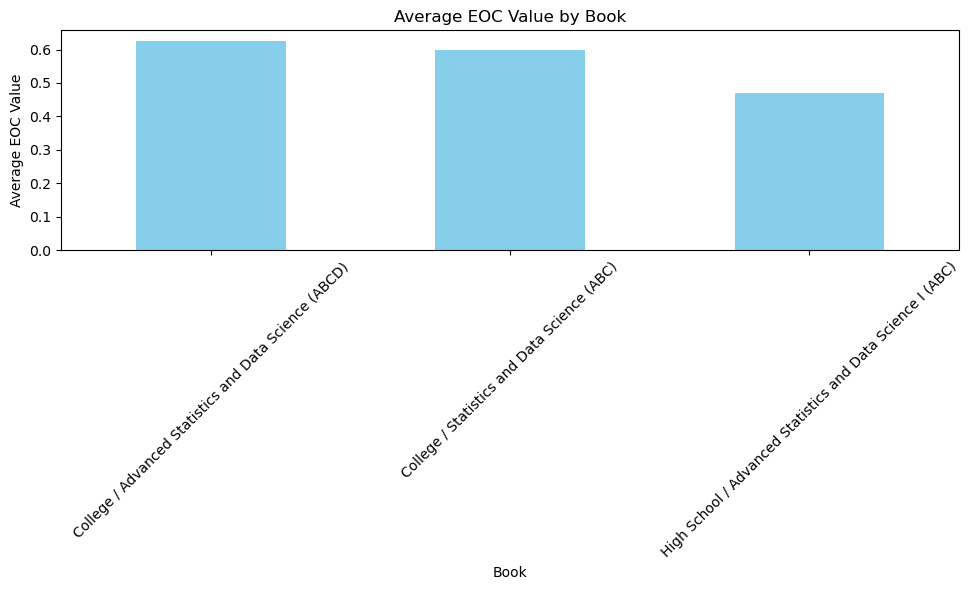

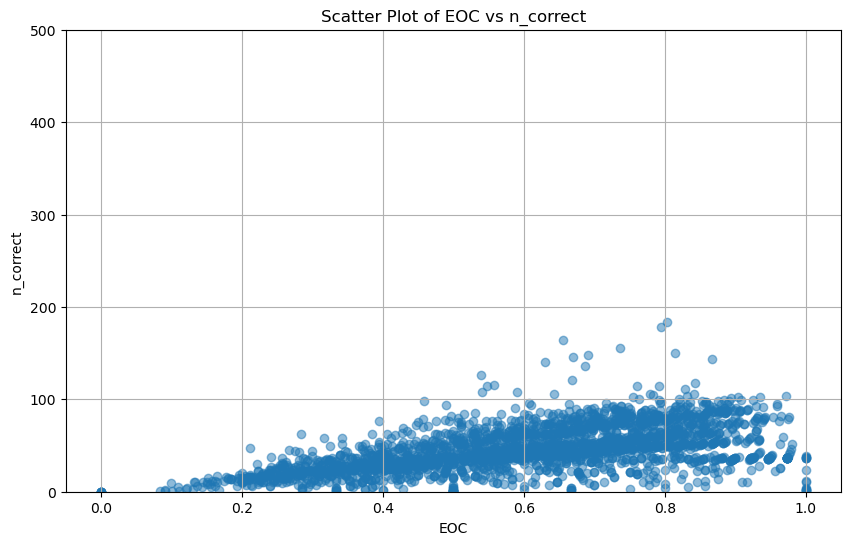

Pearson correlation coefficient: 0.560702324829829
P-value: 6.99850725353209e-210


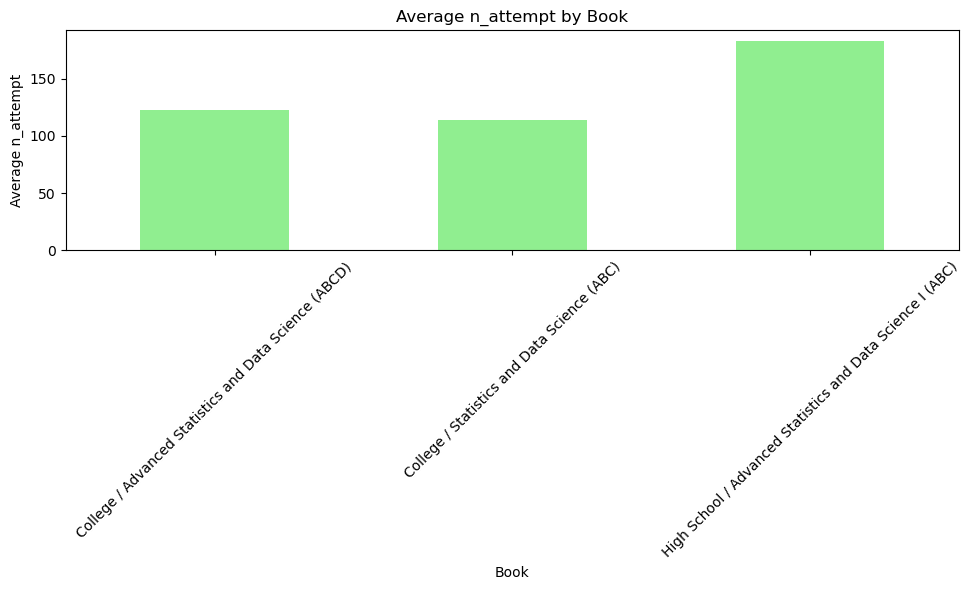

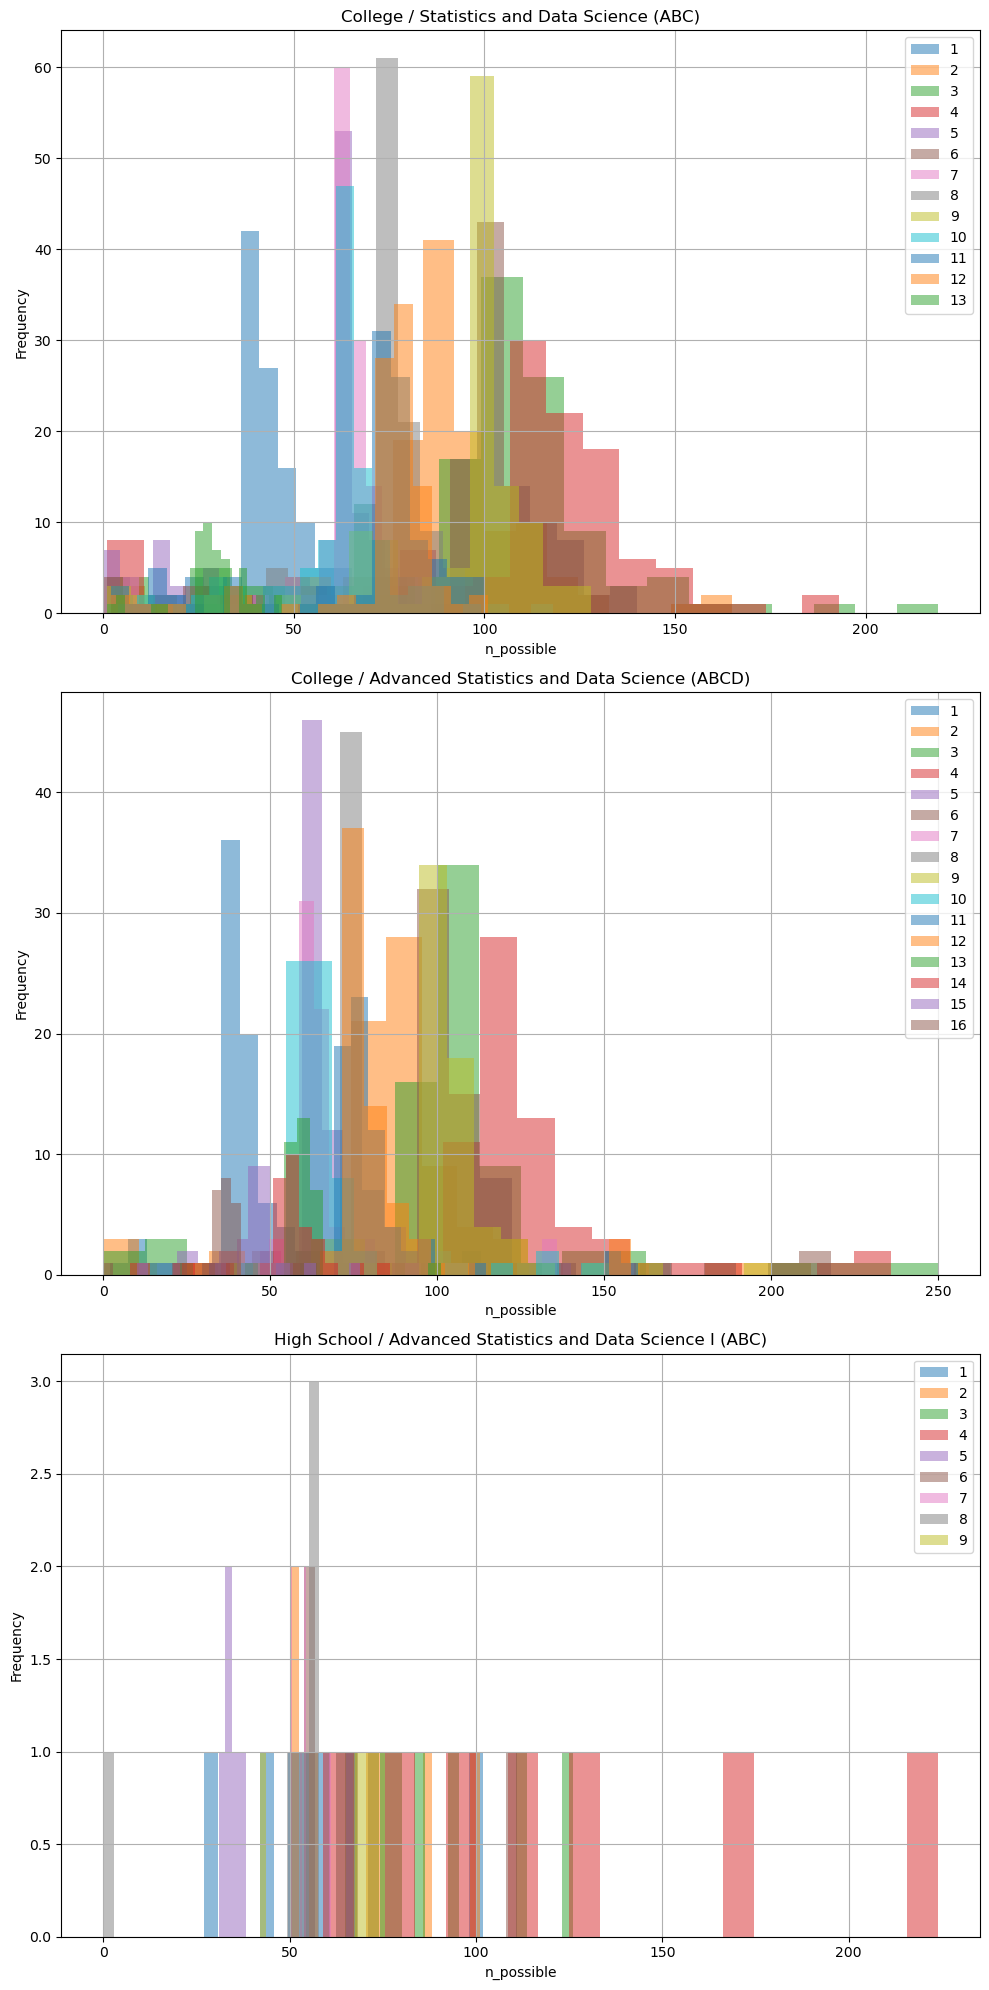

In [8]:
from scipy.stats import pearsonr
df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')

book_eoc_mean = df.groupby('book')['EOC'].mean()

# Plot the bar graph
book_eoc_mean.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Book')
plt.ylabel('Average EOC Value')
plt.title('Average EOC Value by Book')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Extract the "n_attempt" and "EOC" columns
n_attempt = df['n_correct']
EOC = df['EOC']

# Create a scatter plot with switched axes and adjusted y-axis range
plt.figure(figsize=(10, 6))
plt.scatter(EOC, n_attempt, alpha=0.5)  # Switched x and y axes
plt.xlabel('EOC')
plt.ylabel('n_correct')
plt.title('Scatter Plot of EOC vs n_correct')
plt.grid(True)
plt.ylim(0, 500)
plt.show()

df_cleaned = df.dropna(subset=['n_correct', 'EOC'])

# Extract the "n_attempt" and "EOC" columns from the cleaned data
n_attempt = df_cleaned['n_correct']
EOC = df_cleaned['EOC']

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(n_attempt, EOC)

# Display the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# Group the data by the 'book' column and calculate the mean of 'n_attempt' for each category
book_n_attempt_mean = df.groupby('book')['n_attempt'].mean()

# Plot the bar graph
book_n_attempt_mean.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.xlabel('Book')
plt.ylabel('Average n_attempt')
plt.title('Average n_attempt by Book')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

grouped_data = df.groupby(['book', 'chapter_number'])
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# Plot histograms for each book and chapter combination
for book, data in grouped_data:
    book_title = data['book'].iloc[0]  # Get the book title
    chapter_title = data['chapter_number'].iloc[0]  # Get the chapter title
    index = ["College / Statistics and Data Science (ABC)", 
             "College / Advanced Statistics and Data Science (ABCD)", 
             "High School / Advanced Statistics and Data Science I (ABC)"].index(book_title)
    
    # Plot histogram on the corresponding subplot
    axs[index].hist(data['n_possible'], bins=20, alpha=0.5, label=chapter_title)
    axs[index].set_xlabel('n_possible')
    axs[index].set_ylabel('Frequency')
    axs[index].set_title(book_title)
    axs[index].grid(True)
    axs[index].legend()

plt.tight_layout()
plt.show()

book
College / Advanced Statistics and Data Science (ABCD)          521
College / Statistics and Data Science (ABC)                   1020
High School / Advanced Statistics and Data Science I (ABC)      39
Name: student_id, dtype: int64


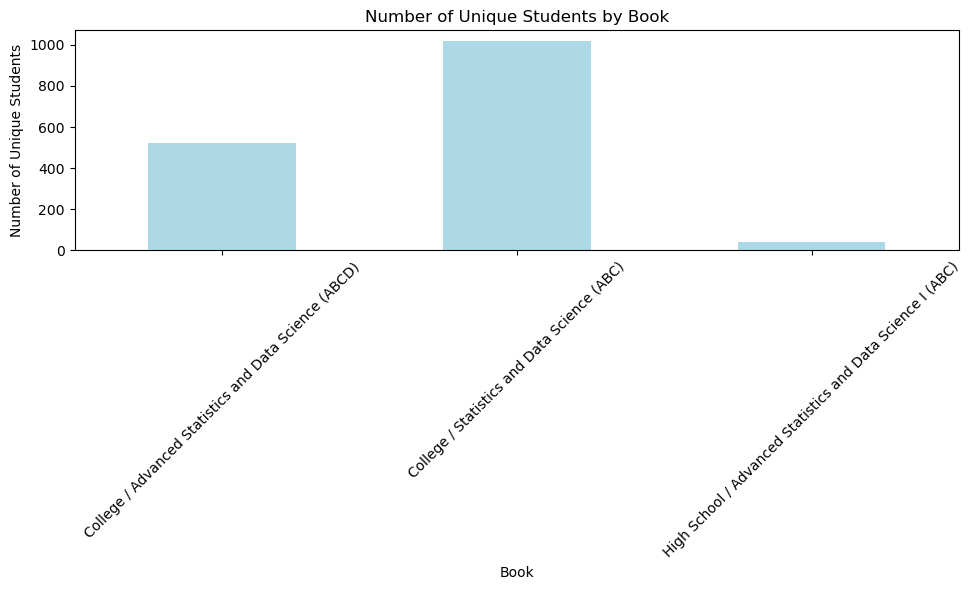

In [18]:
from sklearn import preprocessing

df = pd.read_csv('/Users/rujvi/Downloads/full_03_04/checkpoints_eoc.csv')

# Group the data by the 'book' column and count the number of unique 'student_id's for each book
book_student_count = df.groupby('book')['student_id'].nunique()
print(book_student_count)

# Plot the bar graph
book_student_count.plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.xlabel('Book')
plt.ylabel('Number of Unique Students')
plt.title('Number of Unique Students by Book')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/3145204147.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rujvi/Downloads/full_03_04/page_views.csv')


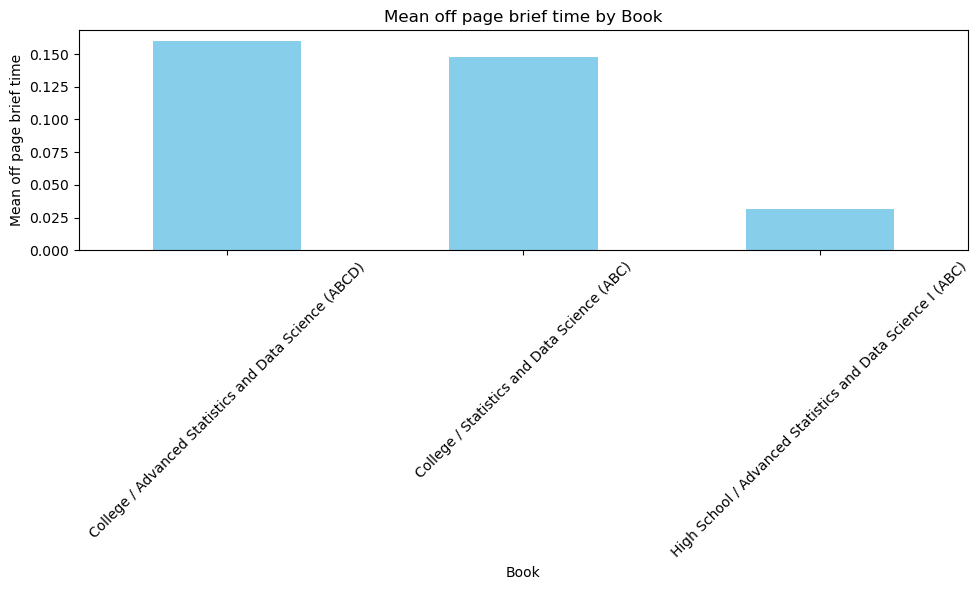

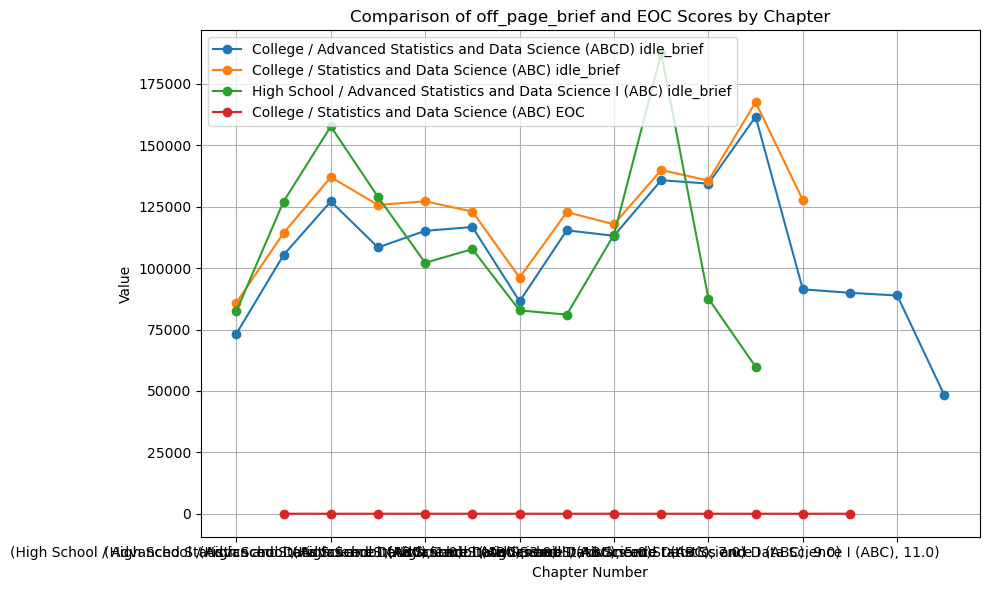

In [10]:
df = pd.read_csv('/Users/rujvi/Downloads/full_03_04/page_views.csv')

# Group the data by 'book' and calculate the mean of 'engaged_time' for each book
book_mean_engaged_time = df.groupby('book')['tried_again_clicks'].mean()

# Plot the bar graph
book_mean_engaged_time.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Book')
plt.ylabel('Mean off page brief time')
plt.title('Mean off page brief time by Book')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Group the data by 'book' and 'chapter_number' and calculate the mean of 'off_page_brief' for each group
grouped_data_off_page_brief = df.groupby(['book', 'chapter_number'])['idle_brief'].mean()

df_eoc_scores = pd.read_csv('/Users/rujvi/Downloads/full_03_04/checkpoints_eoc.csv')

# Filter the data for 'College / Statistics and Data Science (ABC)'
df_ABC1 = df_eoc_scores[df_eoc_scores['book'] == 'College / Statistics and Data Science (ABC)']

# Group by 'Chapter_number' and calculate the mean of 'EOC'
chapter_avg_eoc = df_ABC1.groupby('chapter_number')['EOC'].mean()
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line graph for off_page_brief
for book, data in grouped_data_off_page_brief.groupby('book'):
    data.plot(ax=ax, kind='line', marker='o', linestyle='-', label=f'{book} idle_brief')
chapter_avg_eoc.plot(ax=ax, marker='o', linestyle='-', label='College / Statistics and Data Science (ABC) EOC')
ax.set_title('Comparison of off_page_brief and EOC Scores by Chapter')
ax.set_xlabel('Chapter Number')
ax.set_ylabel('Value')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_38844/2871035622.py:5: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rujvi/Downloads/full_03_04/responses.csv')


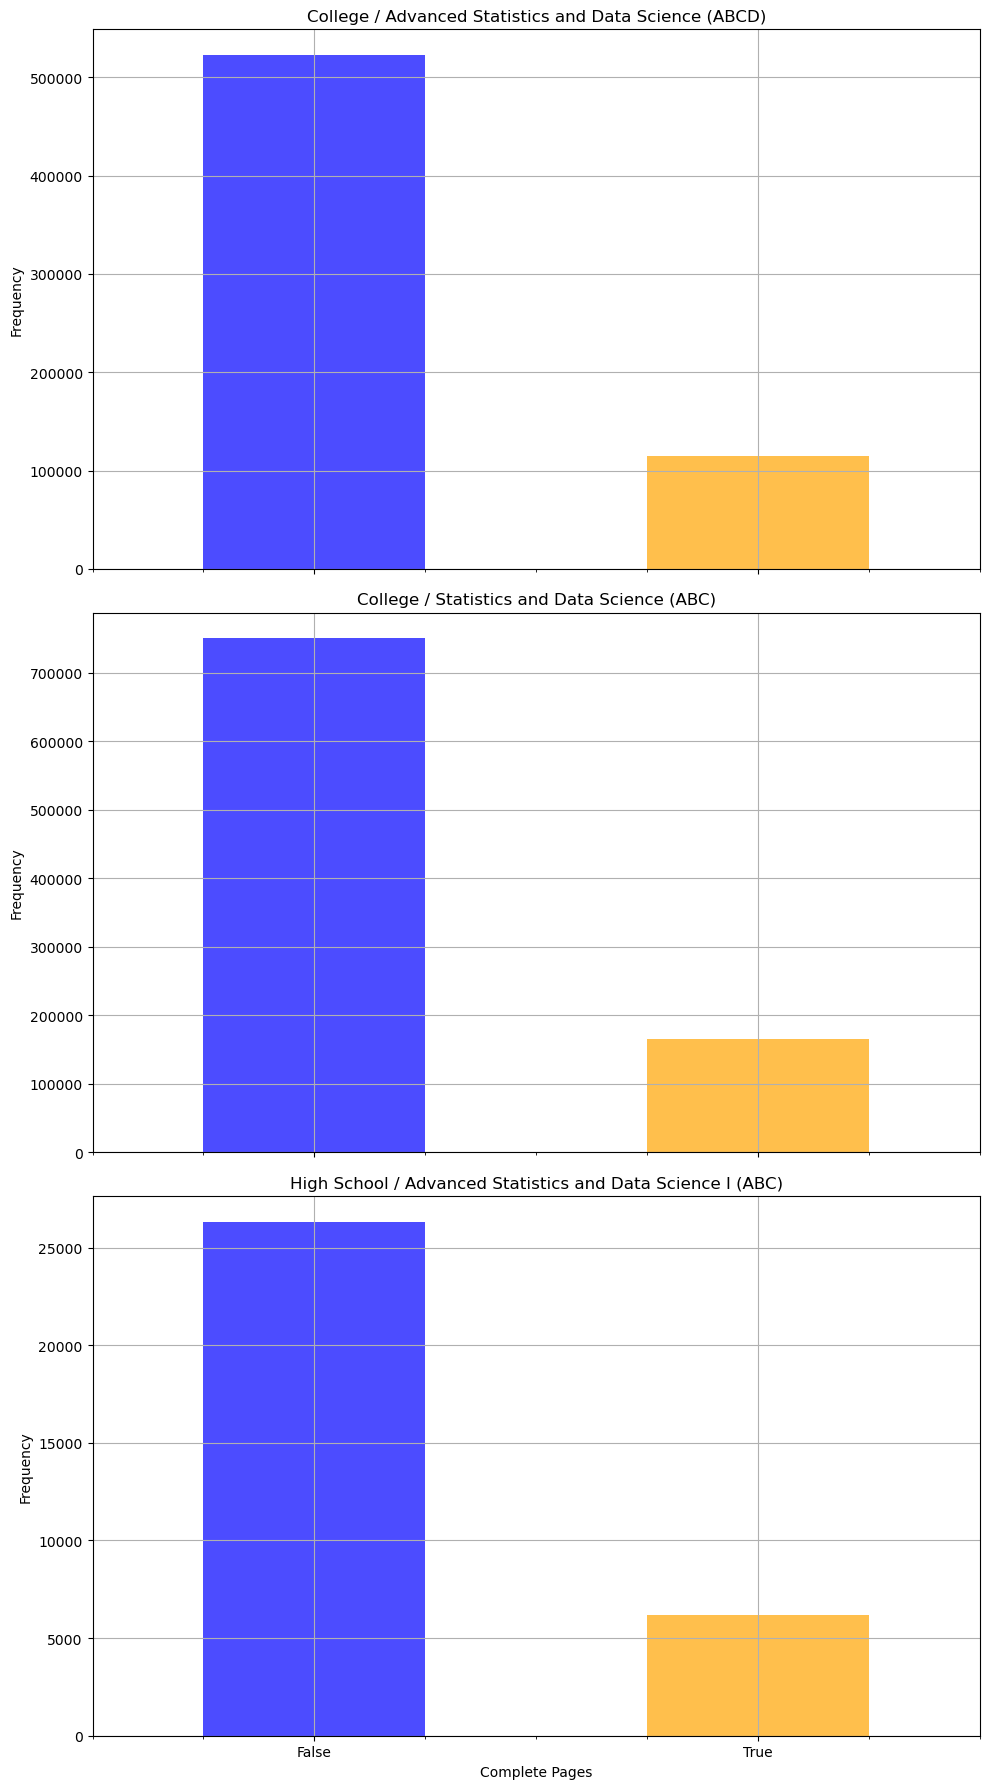

In [29]:

# Load the CSV file
df = pd.read_csv('/Users/rujvi/Downloads/full_03_04/responses.csv')

# Group the data by 'book' and 'complete_pages' and count the occurrences
grouped_data = df.groupby(['book', 'completes_page'])['completes_page'].count().unstack()

# Plot the bar graph for each book
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(10, 6 * len(grouped_data)), sharex=True)

# Iterate over each book and plot the bar graph
for i, (book, data) in enumerate(grouped_data.iterrows()):
    data.plot(kind='bar', ax=axs[i], color=['blue', 'orange'], alpha=0.7)
    axs[i].set_title(book)
    axs[i].set_xlabel('Complete Pages')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticklabels(['False', 'True'], rotation=0)
    axs[i].grid(True)

plt.tight_layout()
plt.show()

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_38844/3781512215.py:1: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")


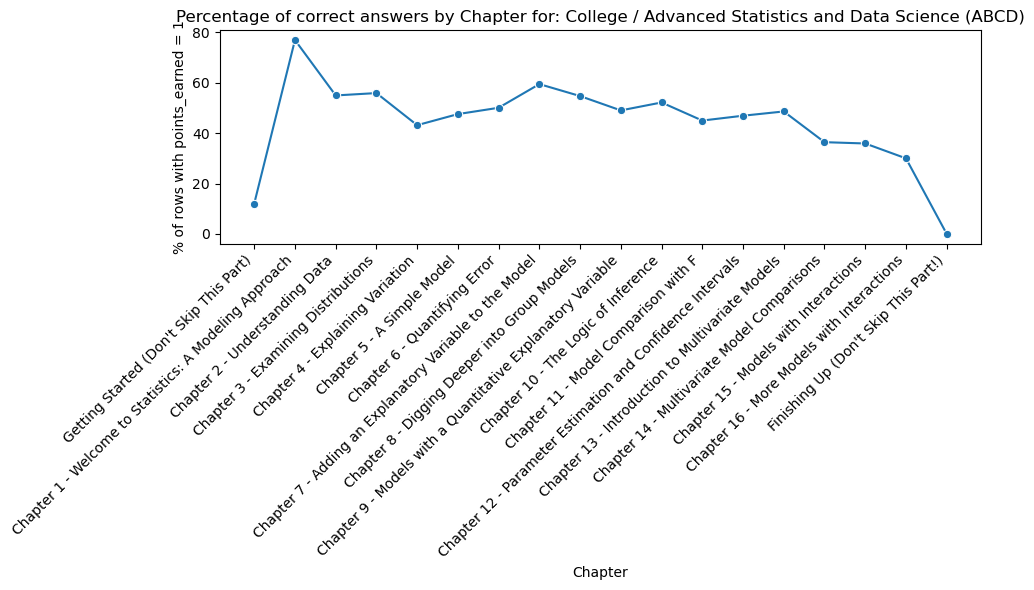

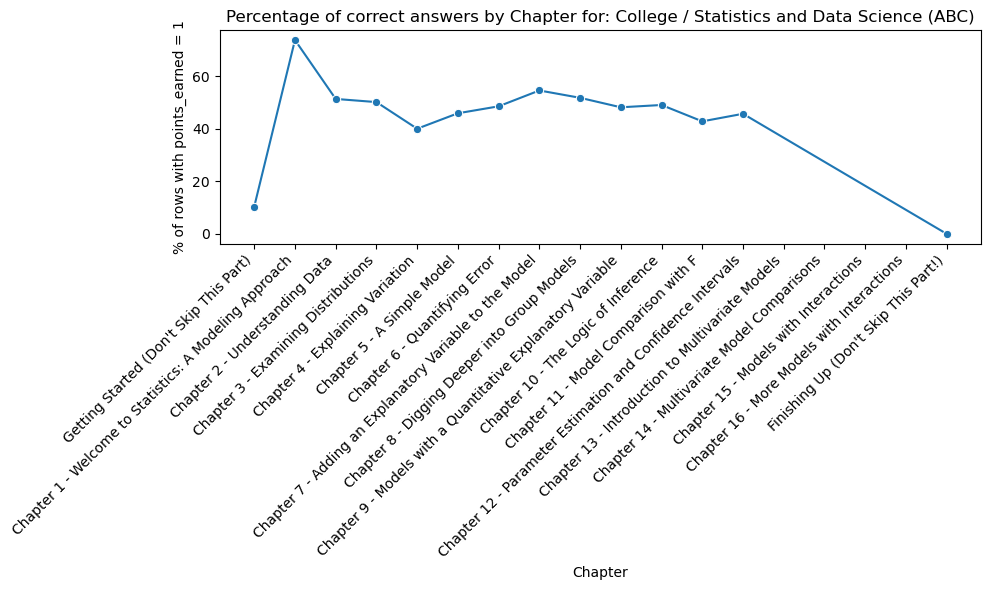

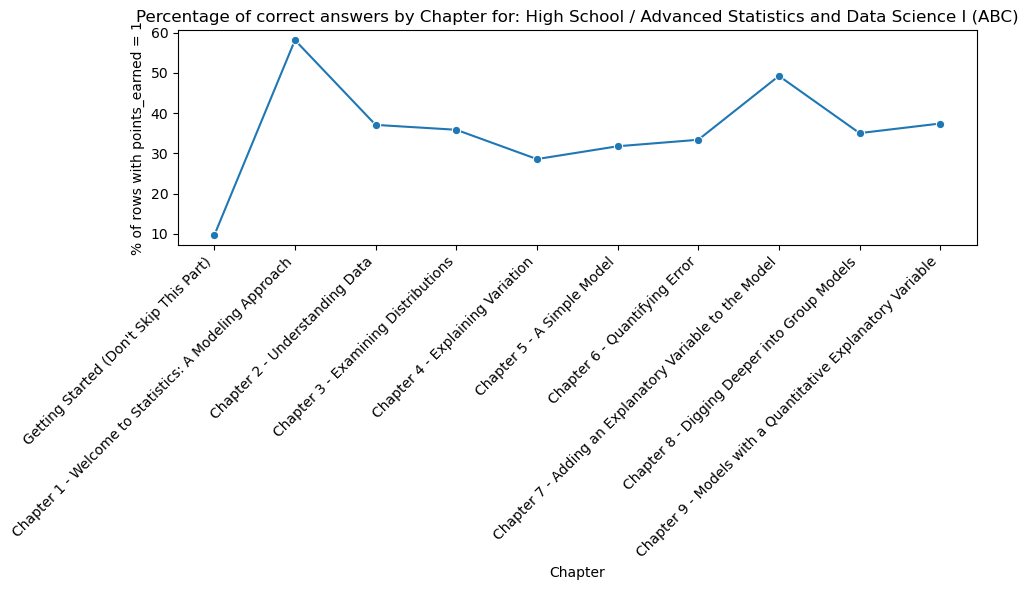

In [30]:
df = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")

chapter_order = [
    "Getting Started (Don't Skip This Part)",
    "Chapter 1 - Welcome to Statistics: A Modeling Approach",
    "Chapter 2 - Understanding Data",
    "Chapter 3 - Examining Distributions",
    "Chapter 4 - Explaining Variation",
    "Chapter 5 - A Simple Model",
    "Chapter 6 - Quantifying Error",
    "Chapter 7 - Adding an Explanatory Variable to the Model",
    "Chapter 8 - Digging Deeper into Group Models",
    "Chapter 9 - Models with a Quantitative Explanatory Variable",
    "Chapter 10 - The Logic of Inference",
    "Chapter 11 - Model Comparison with F",
    "Chapter 12 - Parameter Estimation and Confidence Intervals",
    "Chapter 13 - Introduction to Multivariate Models",
    "Chapter 14 - Multivariate Model Comparisons",
    "Chapter 15 - Models with Interactions",
    "Chapter 16 - More Models with Interactions",
    "Finishing Up (Don't Skip This Part!)"
]

groupbybook = df.groupby('book')
result_dfs = {}
for book, group in groupbybook:
    total_percentage = group.groupby('chapter')['points_earned'].apply(lambda x: (x == 1).mean() * 100).reset_index()
    total_percentage.rename(columns={'points_earned': 'percentage'}, inplace=True)
    # Reorder chapters
    total_percentage['chapter'] = pd.Categorical(total_percentage['chapter'], categories=chapter_order, ordered=True)
    result_dfs[book] = total_percentage.sort_values('chapter')

for book, result_df in result_dfs.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=result_df, x='chapter', y='percentage', marker='o', sort=False)
    plt.xlabel('Chapter')
    plt.ylabel('% of rows with points_earned = 1')
    plt.title(f'Percentage of correct answers by Chapter for: {book}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_38844/1613507820.py:6: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")


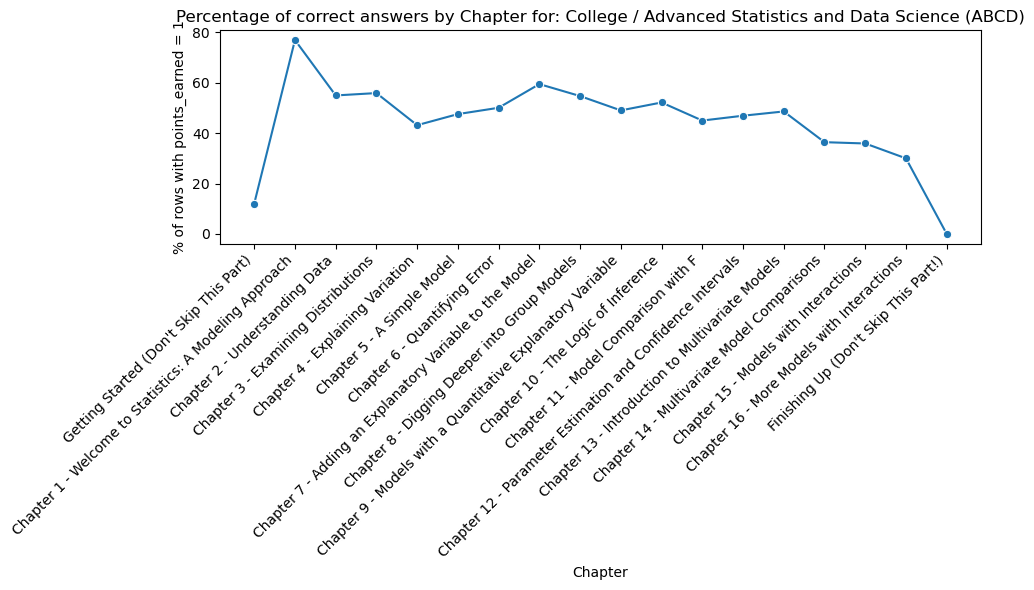

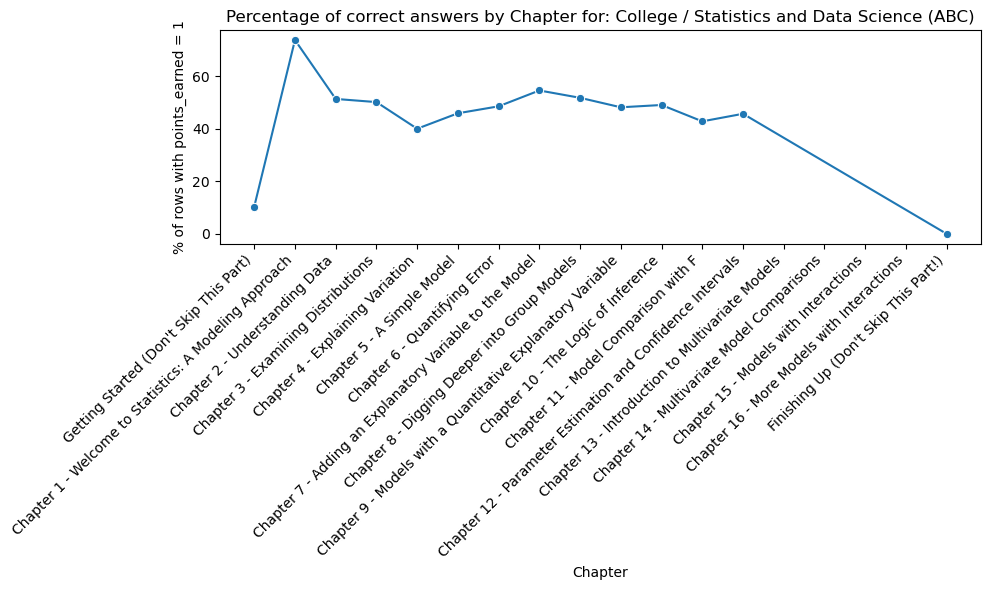

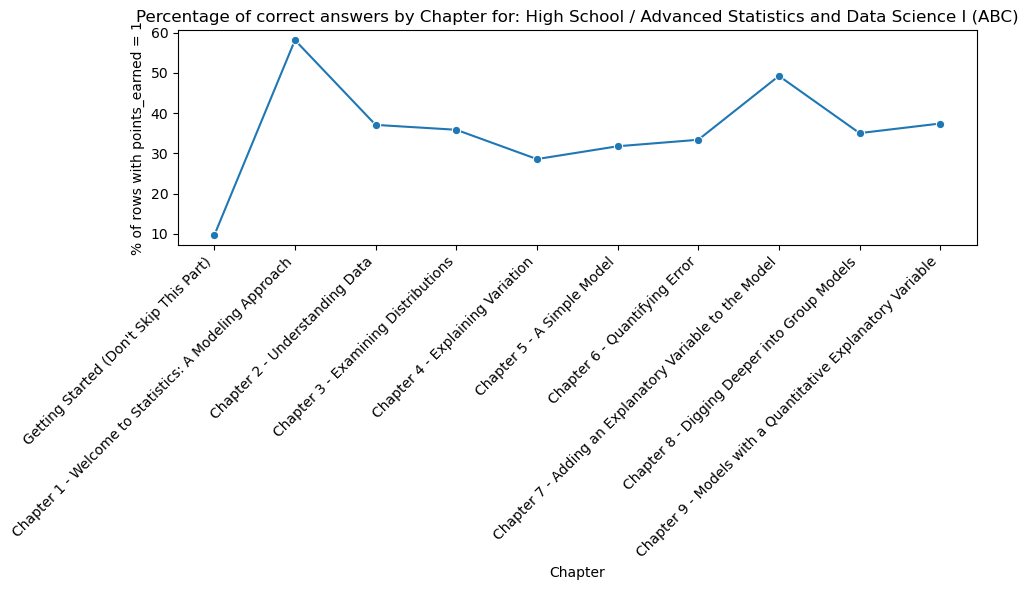

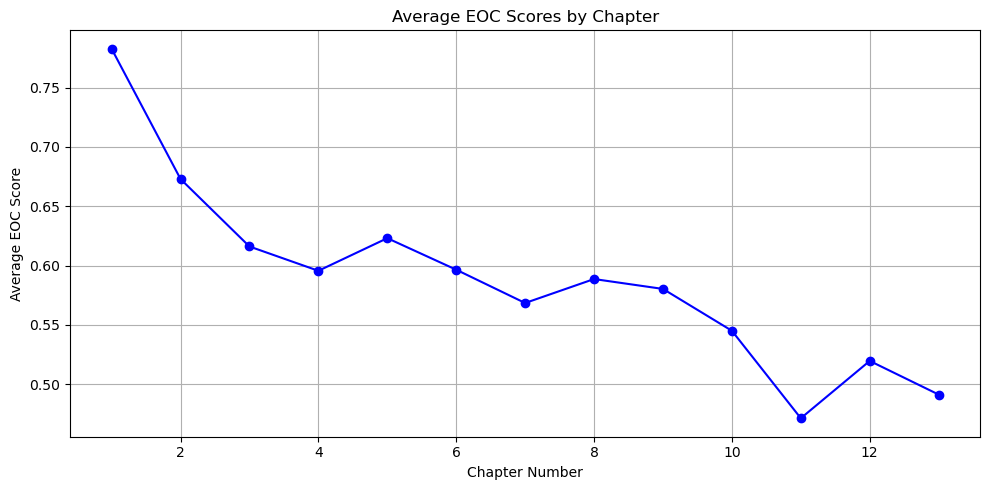

In [31]:
df = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")

chapter_order = [
    "Getting Started (Don't Skip This Part)",
    "Chapter 1 - Welcome to Statistics: A Modeling Approach",
    "Chapter 2 - Understanding Data",
    "Chapter 3 - Examining Distributions",
    "Chapter 4 - Explaining Variation",
    "Chapter 5 - A Simple Model",
    "Chapter 6 - Quantifying Error",
    "Chapter 7 - Adding an Explanatory Variable to the Model",
    "Chapter 8 - Digging Deeper into Group Models",
    "Chapter 9 - Models with a Quantitative Explanatory Variable",
    "Chapter 10 - The Logic of Inference",
    "Chapter 11 - Model Comparison with F",
    "Chapter 12 - Parameter Estimation and Confidence Intervals",
    "Chapter 13 - Introduction to Multivariate Models",
    "Chapter 14 - Multivariate Model Comparisons",
    "Chapter 15 - Models with Interactions",
    "Chapter 16 - More Models with Interactions",
    "Finishing Up (Don't Skip This Part!)"
]

groupbybook = df.groupby('book')
result_dfs = {}
for book, group in groupbybook:
    total_percentage = group.groupby('chapter')['points_earned'].apply(lambda x: (x == 1).mean() * 100).reset_index()
    total_percentage.rename(columns={'points_earned': 'percentage'}, inplace=True)
    # Reorder chapters
    total_percentage['chapter'] = pd.Categorical(total_percentage['chapter'], categories=chapter_order, ordered=True)
    result_dfs[book] = total_percentage.sort_values('chapter')

for book, result_df in result_dfs.items():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=result_df, x='chapter', y='percentage', marker='o', sort=False)
    plt.xlabel('Chapter')
    plt.ylabel('% of rows with points_earned = 1')
    plt.title(f'Percentage of correct answers by Chapter for: {book}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')

# Filter to get only rows where Product_Type is 'phone'
ABC1 = df[df['book'] == 'College / Statistics and Data Science (ABC)']

# Group by 'Chapter_number' and calculate the mean of 'EOC'
chapter_avg_eoc = ABC1.groupby('chapter_number')['EOC'].mean()

# Create a line plot
plt.figure(figsize=(10, 5))  # Adjust the size of the plot as necessary
plt.plot(chapter_avg_eoc.index, chapter_avg_eoc, marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Average EOC Scores by Chapter')
plt.xlabel('Chapter Number')
plt.ylabel('Average EOC Score')

# Optionally add grid for better readability
plt.grid(True)

plt.tight_layout()
plt.show()


In [32]:
# Load files
df_eoc = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')
df_responses = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")

# Ensure both dataframes include the 'book' column
# Adjust these lines if 'book' is missing in one of the CSV files; assume it's included for now
merged_df = pd.merge(df_eoc[['student_id', 'EOC', 'chapter_number', 'book']], 
                     df_responses[['student_id', 'points_earned', 'points_possible', 'book']], 
                     on=['student_id', 'book'])

# Calculate the 'total_percent' column
merged_df['total_percent'] = (merged_df['points_earned'] / merged_df['points_possible']) * 100
merged_df.to_csv('/Users/rujvi/Downloads/merged_data.csv', index=False)

print("Merged DataFrame saved successfully with 'book' included!")

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_38844/1122709687.py:7: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_responses = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")


Merged DataFrame saved successfully with 'book' included!


/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/29497954.py:7: DtypeWarning: Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_responses = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")


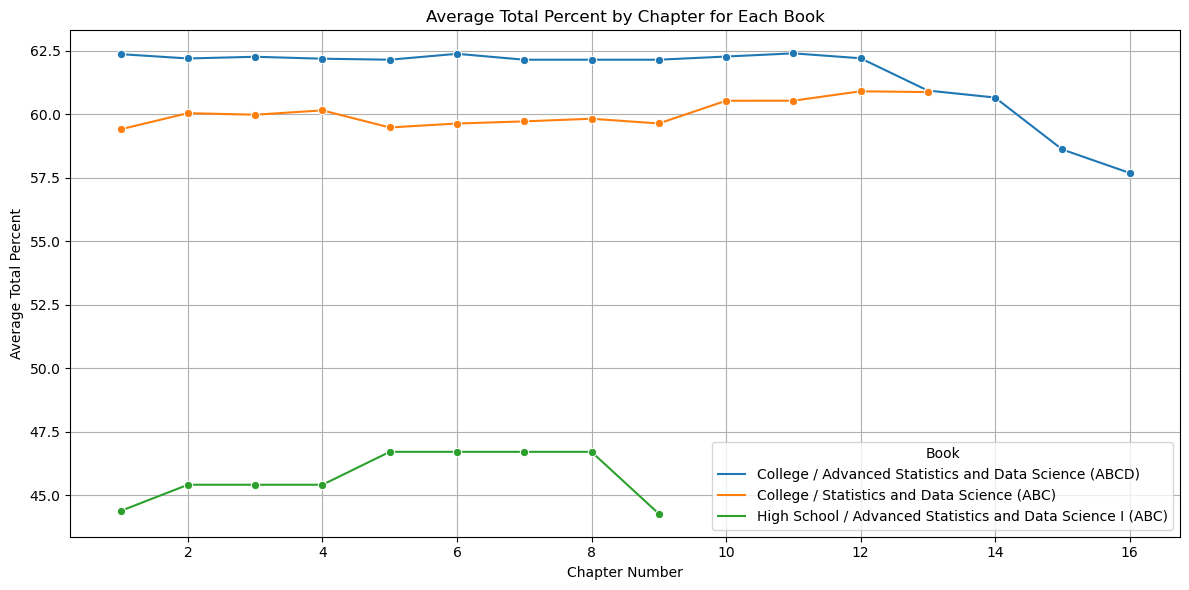

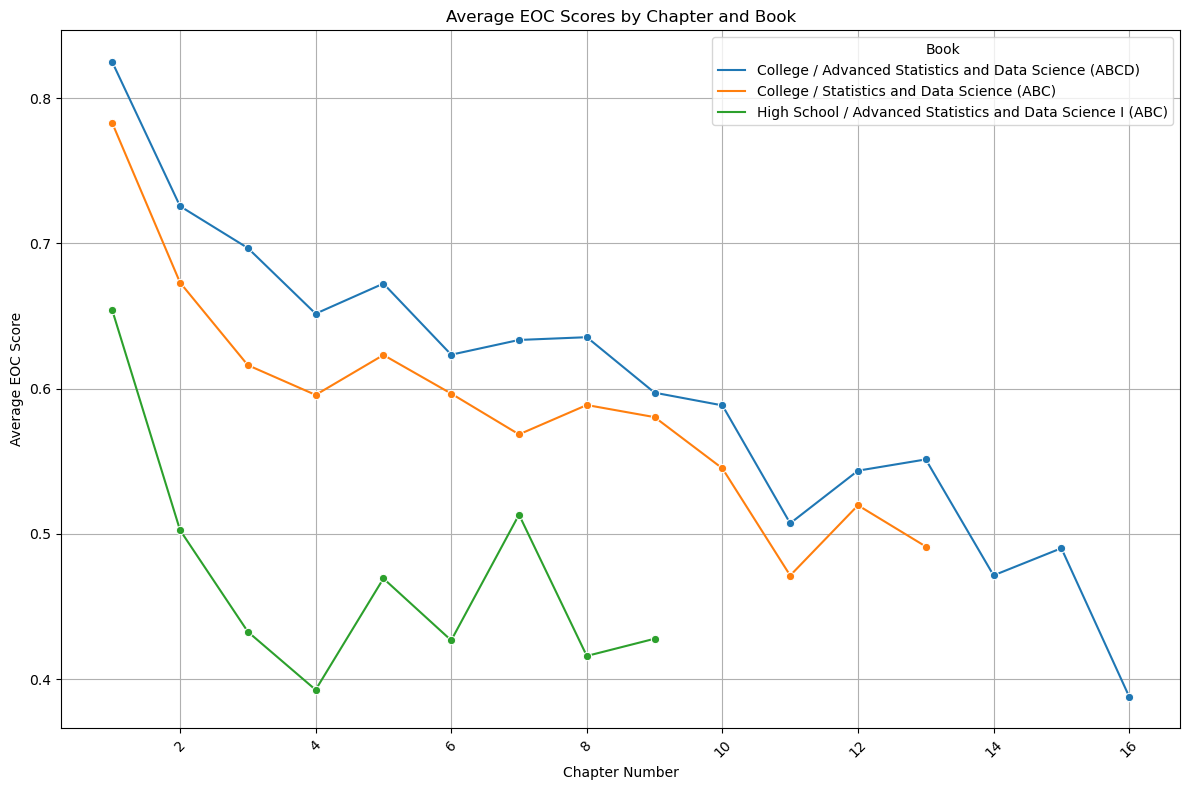

In [12]:
df_eoc = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')
df_responses = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")

# Merge the dataframes on 'student_id'
merged_df = pd.merge(df_eoc[['student_id', 'book', 'chapter_number']], 
                     df_responses[['student_id', 'points_earned', 'points_possible']], 
                     on='student_id')

# Calculate the 'total_percent' column
merged_df['total_percent'] = (merged_df['points_earned'] / merged_df['points_possible']) * 100

# Group the data by 'book' and 'chapter' and calculate the mean of 'total_percent' for each group
grouped_data = merged_df.groupby(['book', 'chapter_number'])['total_percent'].mean().reset_index()

# Plot the line graph for each book
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='chapter_number', y='total_percent', hue='book', marker='o')
plt.xlabel('Chapter Number')
plt.ylabel('Average Total Percent')
plt.title('Average Total Percent by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.tight_layout()
plt.show()

# Check if the dataframe has the necessary columns
if 'book' not in df_eoc.columns or 'chapter_number' not in df_eoc.columns:
    print("Dataframe lacks 'book' or 'chapter_number' columns.")
else:
    # Calculate the mean EOC by 'book' and 'chapter_number'
    mean_eoc = df_eoc.groupby(['book', 'chapter_number'])['EOC'].mean().reset_index()

    # Create a line plot
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=mean_eoc, x='chapter_number', y='EOC', hue='book', marker='o', style='book', dashes=False)
    
    # Enhance the plot
    plt.title('Average EOC Scores by Chapter and Book')
    plt.xlabel('Chapter Number')
    plt.ylabel('Average EOC Score')
    plt.legend(title='Book', loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()
    
    # Show the plot
    plt.show()


/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/3417068508.py:8: DtypeWarning:

Columns (34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.



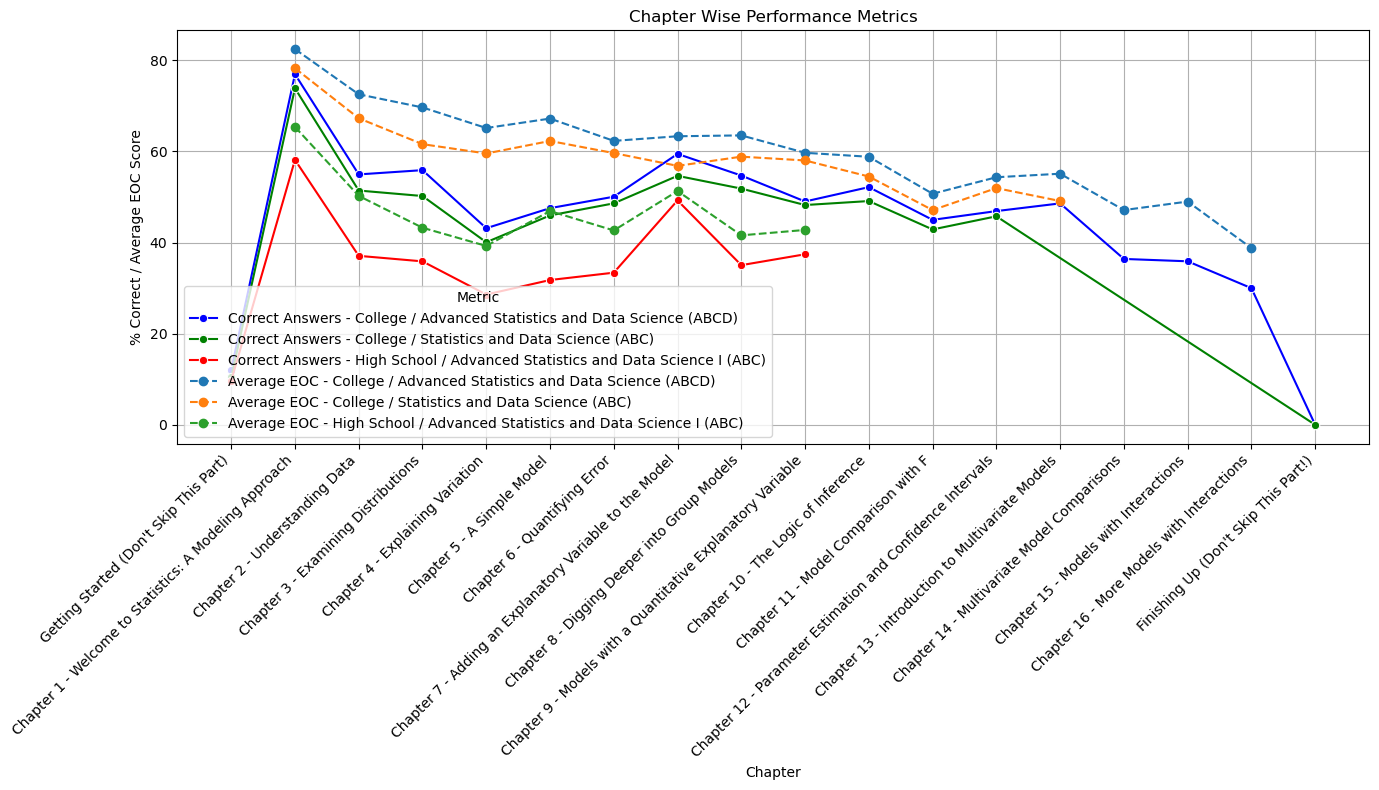

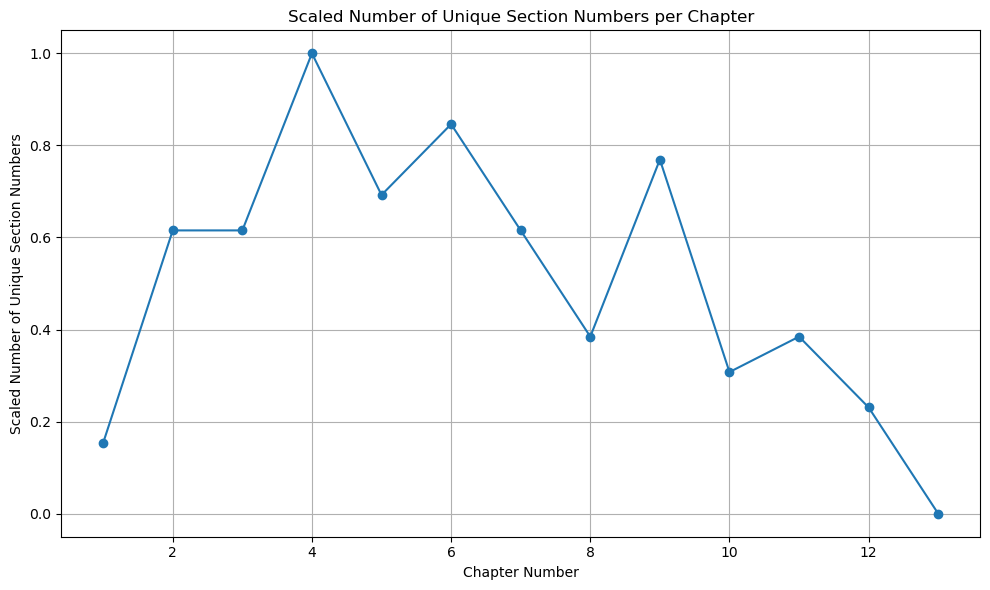

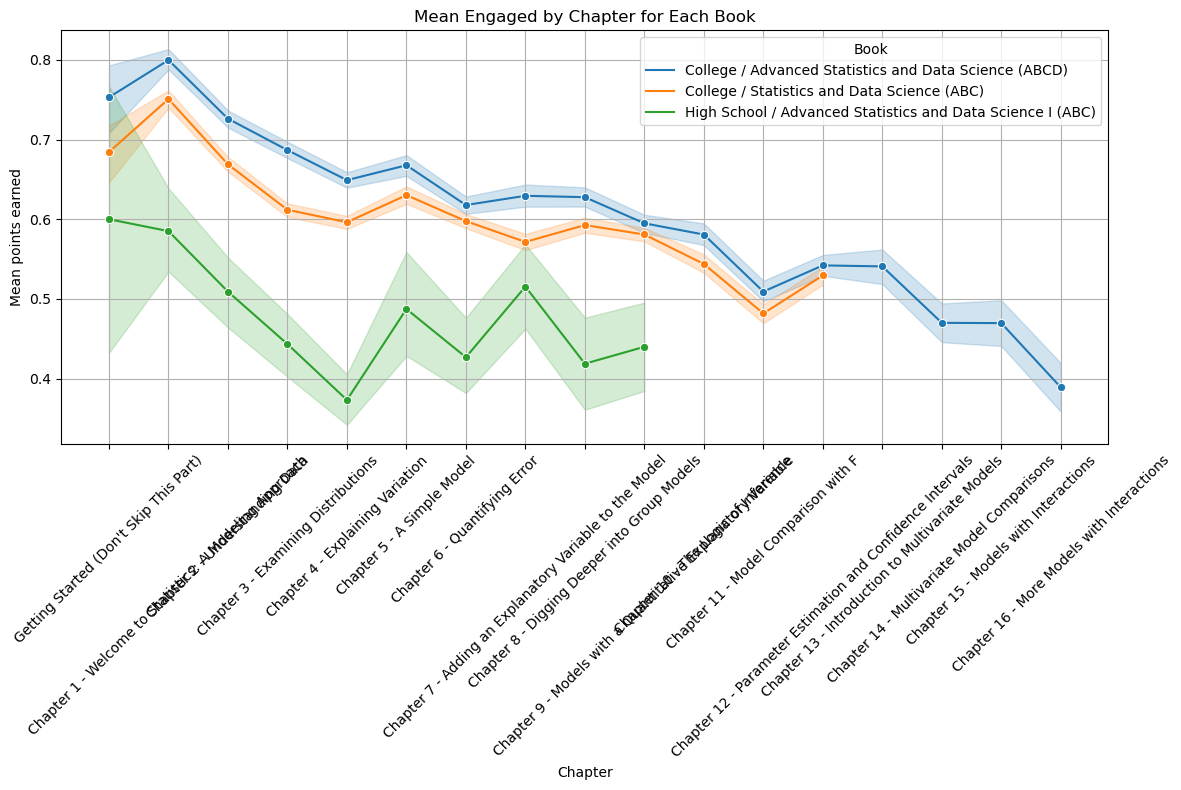

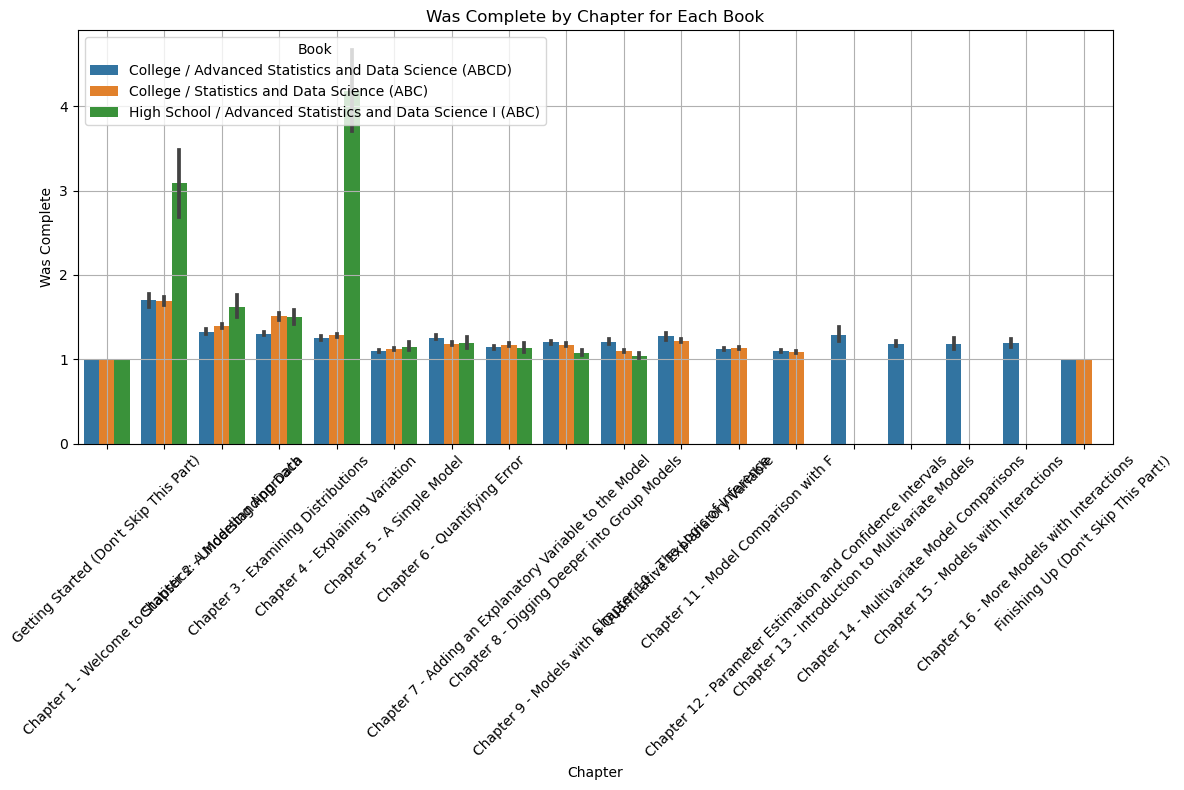

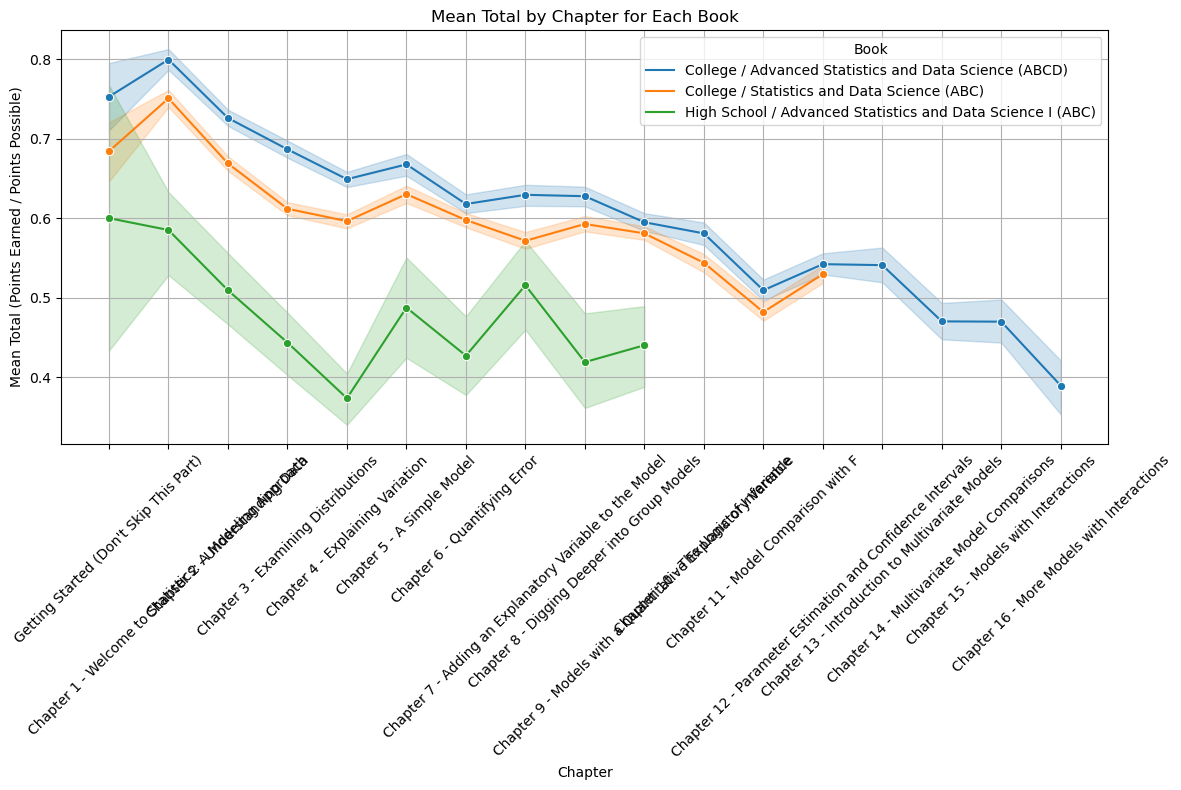

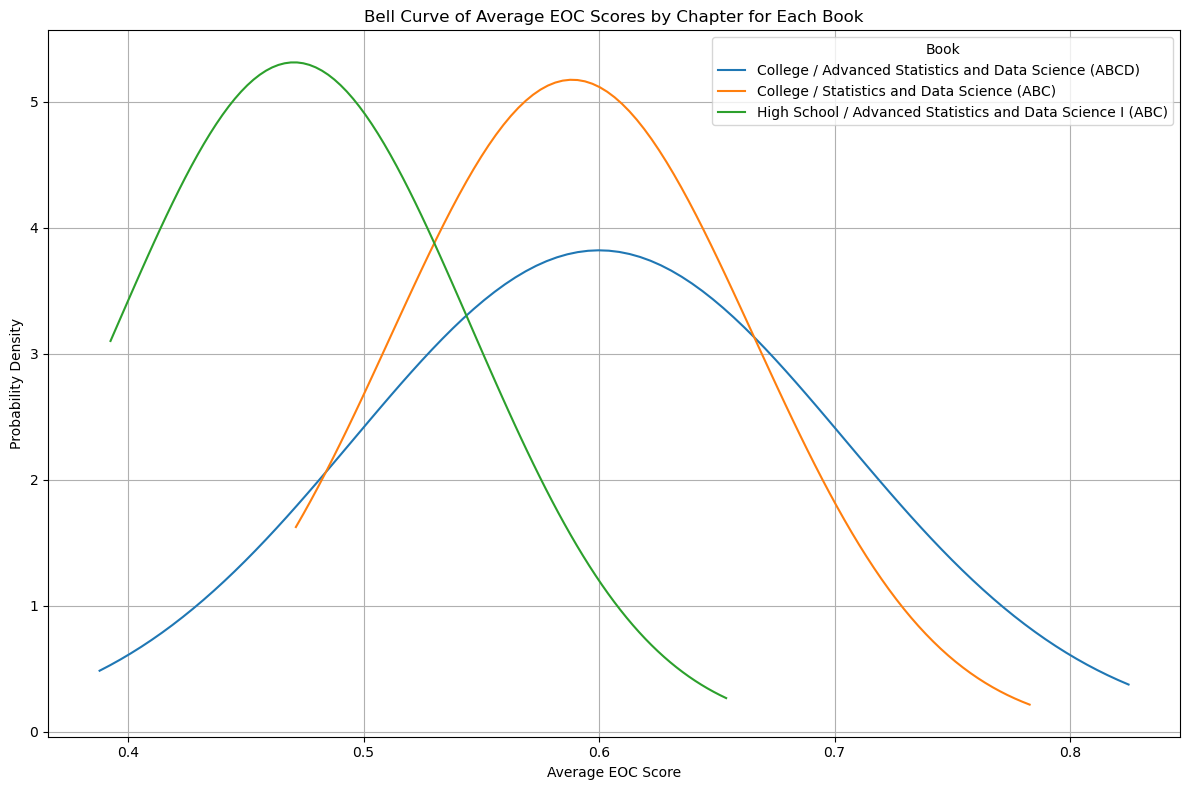

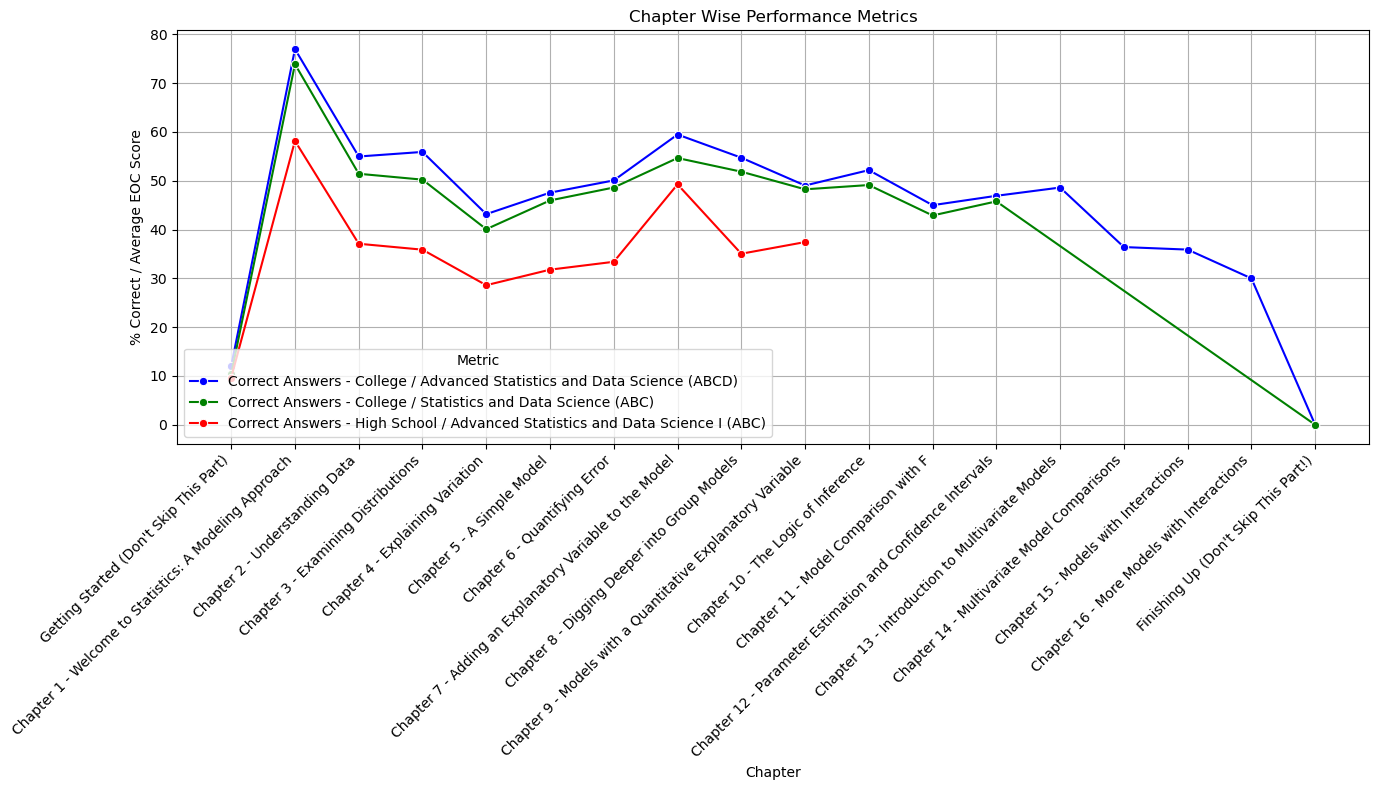

In [25]:
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
# Load CSV files
df_responses = pd.read_csv("/Users/rujvi/Downloads/Random Sample of Data Files_03_04/responses.csv")
df_checkpoints = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')

# Predefined chapter order
chapter_order = [
    "Getting Started (Don't Skip This Part)",
    "Chapter 1 - Welcome to Statistics: A Modeling Approach",
    "Chapter 2 - Understanding Data",
    "Chapter 3 - Examining Distributions",
    "Chapter 4 - Explaining Variation",
    "Chapter 5 - A Simple Model",
    "Chapter 6 - Quantifying Error",
    "Chapter 7 - Adding an Explanatory Variable to the Model",
    "Chapter 8 - Digging Deeper into Group Models",
    "Chapter 9 - Models with a Quantitative Explanatory Variable",
    "Chapter 10 - The Logic of Inference",
    "Chapter 11 - Model Comparison with F",
    "Chapter 12 - Parameter Estimation and Confidence Intervals",
    "Chapter 13 - Introduction to Multivariate Models",
    "Chapter 14 - Multivariate Model Comparisons",
    "Chapter 15 - Models with Interactions",
    "Chapter 16 - More Models with Interactions",
    "Finishing Up (Don't Skip This Part!)"
]

# Calculate percentage correct per chapter per book
groupbybook = df_responses.groupby('book')
result_dfs = {}
for book, group in groupbybook:
    total_percentage = group.groupby('chapter')['points_earned'].apply(lambda x: (x == 1).mean() * 100).reset_index()
    total_percentage.rename(columns={'points_earned': 'percentage'}, inplace=True)
    # Reorder chapters
    total_percentage['chapter'] = pd.Categorical(total_percentage['chapter'], categories=chapter_order, ordered=True)
    result_dfs[book] = total_percentage.sort_values('chapter')

# Calculate mean EOC by book and chapter number, multiplied by 100 for percentage scale
mean_eoc = df_checkpoints.groupby(['book', 'chapter_number'])['EOC'].mean().reset_index()
mean_eoc['EOC'] = mean_eoc['EOC'] * 100  # Scaling the EOC scores

# Plot all data in one figure
plt.figure(figsize=(14, 8))

# Plotting percentage correct by chapter for each book
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
i = 0
for book, result_df in result_dfs.items():
    sns.lineplot(data=result_df, x='chapter', y='percentage', marker='o', label=f'Correct Answers - {book}', color=colors[i % len(colors)])
    i += 1

# Plotting average EOC scores for all books
for book, group in mean_eoc.groupby('book'):
    plt.plot(group['chapter_number'], group['EOC'], marker='o', linestyle='--', label=f'Average EOC - {book}')

plt.xlabel('Chapter')
plt.ylabel('% Correct / Average EOC Score')
plt.title('Chapter Wise Performance Metrics')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='lower left')  # Changed legend location to lower left
plt.grid(True)
plt.tight_layout()
plt.show()


# Filter the data for the specified book
filtered_df = df[df['book'] == 'College / Statistics and Data Science (ABC)']

# Group the filtered data by both chapter_number and section_number
grouped_data = filtered_df.groupby('chapter_number')['section_number'].nunique().reset_index()

# Perform Min-Max scaling on the section_number column
scaler = MinMaxScaler()
grouped_data['section_number_scaled'] = scaler.fit_transform(grouped_data[['section_number']])

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['chapter_number'], grouped_data['section_number_scaled'], marker='o', linestyle='-')
plt.xlabel('Chapter Number')
plt.ylabel('Scaled Number of Unique Section Numbers')
plt.title('Scaled Number of Unique Section Numbers per Chapter')
plt.grid(True)
plt.tight_layout()
plt.show()


# Convert 'chapter' column to categorical with specified order
df_responses['chapter'] = pd.Categorical(df_responses['chapter'], categories=chapter_order, ordered=True)

# Plot the line graph for each book
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_responses, x='chapter', y='points_earned', hue='book', marker='o', estimator='mean')
plt.xlabel('Chapter')
plt.ylabel('Mean points earned')
plt.title('Mean Engaged by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Convert 'chapter' column to categorical with specified order
df_responses['chapter'] = pd.Categorical(df_responses['chapter'], categories=chapter_order, ordered=True)

# Plot the bar graph for each book using the 'was_complete' column
plt.figure(figsize=(12, 8))
sns.barplot(data=df_responses, x='chapter', y='attempt', hue='book')
plt.xlabel('Chapter')
plt.ylabel('Was Complete')
plt.title('Was Complete by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the 'total' column
df_responses['total'] = df_responses['points_earned'] / df_responses['points_possible']

# Plot the line graph for each book
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_responses, x='chapter', y='total', hue='book', marker='o', estimator='mean')
plt.xlabel('Chapter')
plt.ylabel('Mean Total (Points Earned / Points Possible)')
plt.title('Mean Total by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average EOC scores by chapter for each book
grouped_data = df_checkpoints.groupby(['book', 'chapter_number'])['EOC'].mean().reset_index()

# Plot bell curves for each book
plt.figure(figsize=(12, 8))
for book in grouped_data['book'].unique():
    book_data = grouped_data[grouped_data['book'] == book]
    mu, sigma = stats.norm.fit(book_data['EOC'])
    x = np.linspace(book_data['EOC'].min(), book_data['EOC'].max(), 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=book)

plt.xlabel('Average EOC Score')
plt.ylabel('Probability Density')
plt.title('Bell Curve of Average EOC Scores by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.tight_layout()
plt.show()

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Define the app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Chapter-wise EOC Scores"),
    dcc.Dropdown(
        id='book-dropdown',
        options=[
            {'label': 'College / Statistics and Data Science (ABC)', 'value': 'College / Statistics and Data Science (ABC)'},
            {'label': 'College / Advanced Statistics and Data Science (ABCD)', 'value': 'College / Advanced Statistics and Data Science (ABCD)'},
            {'label': 'High School / Advanced Statistics and Data Science I (ABC)', 'value': 'High School / Advanced Statistics and Data Science I (ABC)'}
        ],
        value='College / Statistics and Data Science (ABC)'
    ),
    dcc.Graph(id='eoc-graph')
])

@app.callback(
    Output('eoc-graph', 'figure'),
    [Input('book-dropdown', 'value')]
)
def update_graph(selected_book):
    # Filter data based on selected book
    selected_data = df_checkpoints[df_checkpoints['book'] == selected_book]
    
    # Group by 'chapter_number' and calculate the mean of 'EOC'
    chapter_avg_eoc = selected_data.groupby('chapter_number')['EOC'].mean().reset_index()

    # Create a line plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=chapter_avg_eoc['chapter_number'], y=chapter_avg_eoc['EOC'], mode='lines+markers'))
    fig.update_layout(title='Average EOC Scores by Chapter',
                      xaxis_title='Chapter Number',
                      yaxis_title='Average EOC Score')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
    
    
# Calculate percentage correct per chapter per book
groupbybook = df_responses.groupby('book')
result_dfs = {}
for book, group in groupbybook:
    total_percentage = group.groupby('chapter')['points_earned'].apply(lambda x: (x == 1).mean() * 100).reset_index()
    total_percentage.rename(columns={'points_earned': 'percentage'}, inplace=True)
    # Reorder chapters
    total_percentage['chapter'] = pd.Categorical(total_percentage['chapter'], categories=chapter_order, ordered=True)
    result_dfs[book] = total_percentage.sort_values('chapter')


# Plot all data in one figure
plt.figure(figsize=(14, 8))

# Plotting percentage correct by chapter for each book
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
i = 0
for book, result_df in result_dfs.items():
    sns.lineplot(data=result_df, x='chapter', y='percentage', marker='o', label=f'Correct Answers - {book}', color=colors[i % len(colors)])
    i += 1


plt.xlabel('Chapter')
plt.ylabel('% Correct / Average EOC Score')
plt.title('Chapter Wise Performance Metrics')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='lower left')  # Changed legend location to lower left
plt.grid(True)
plt.tight_layout()
plt.show()



/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/83613836.py:6: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/83613836.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



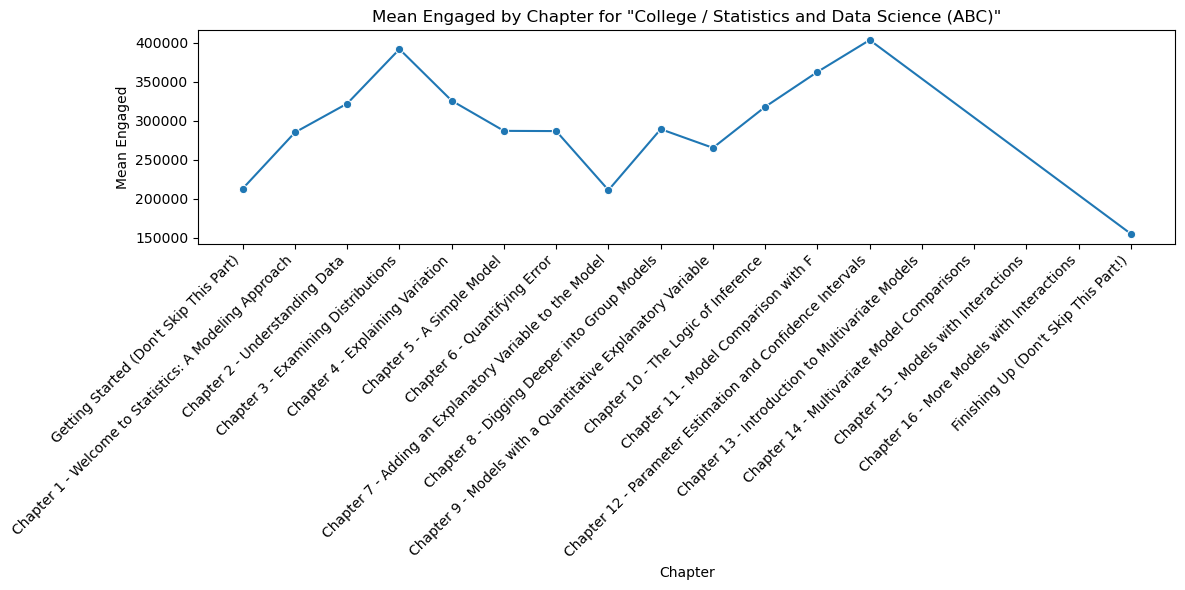

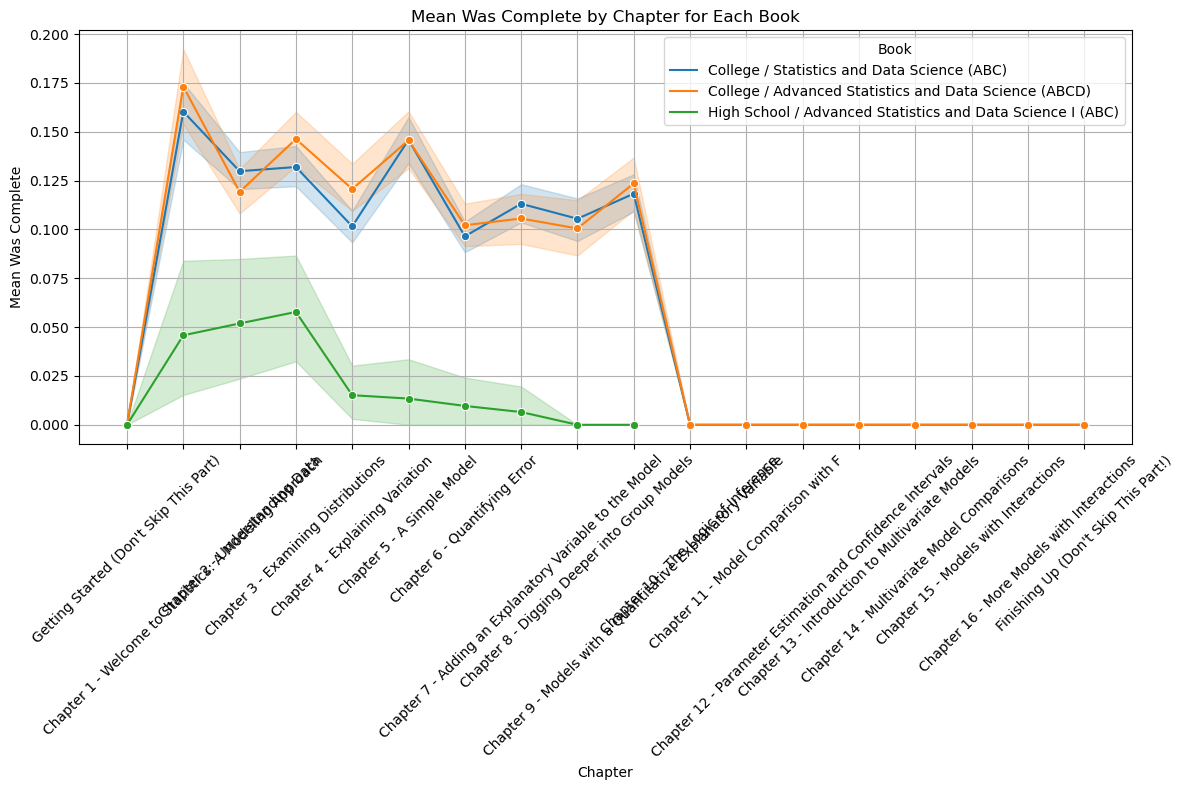

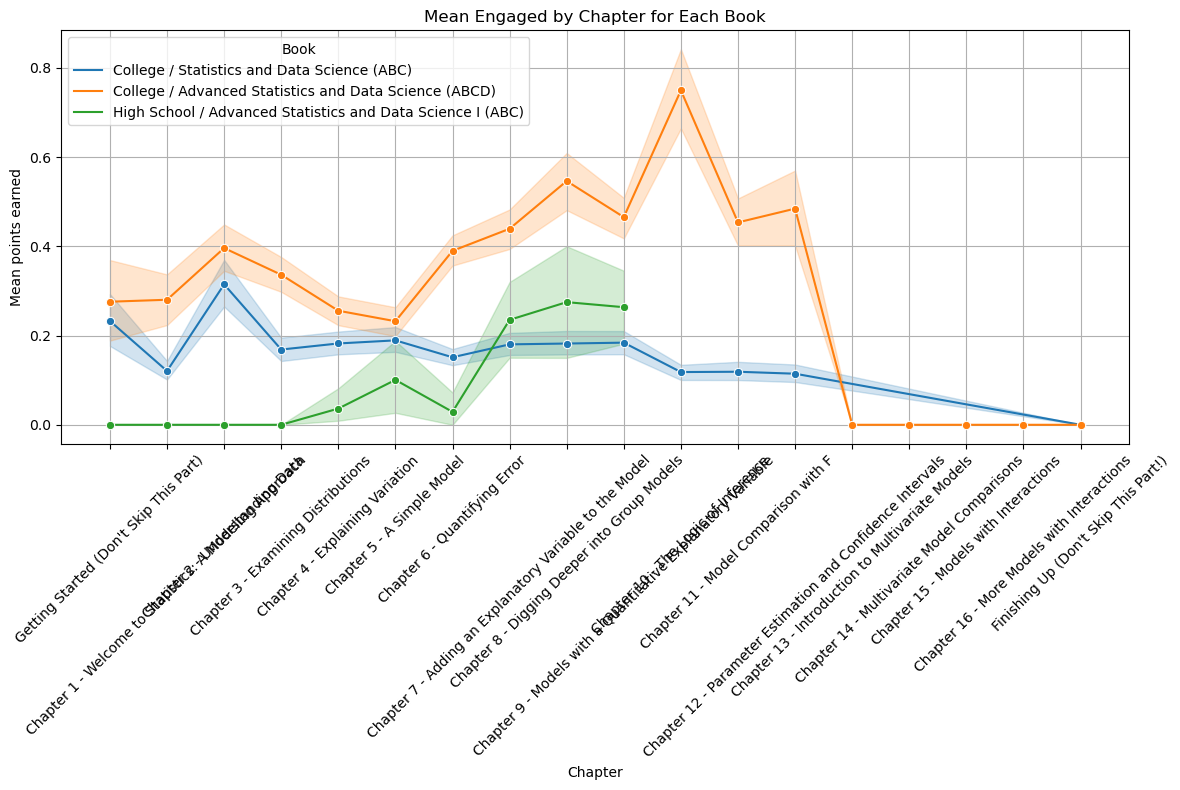

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')

# Define the desired order of chapters
chapter_order = [
    "Getting Started (Don't Skip This Part)",
    "Chapter 1 - Welcome to Statistics: A Modeling Approach",
    "Chapter 2 - Understanding Data",
    "Chapter 3 - Examining Distributions",
    "Chapter 4 - Explaining Variation",
    "Chapter 5 - A Simple Model",
    "Chapter 6 - Quantifying Error",
    "Chapter 7 - Adding an Explanatory Variable to the Model",
    "Chapter 8 - Digging Deeper into Group Models",
    "Chapter 9 - Models with a Quantitative Explanatory Variable",
    "Chapter 10 - The Logic of Inference",
    "Chapter 11 - Model Comparison with F",
    "Chapter 12 - Parameter Estimation and Confidence Intervals",
    "Chapter 13 - Introduction to Multivariate Models",
    "Chapter 14 - Multivariate Model Comparisons",
    "Chapter 15 - Models with Interactions",
    "Chapter 16 - More Models with Interactions",
    "Finishing Up (Don't Skip This Part!)"
]

# Filter the data for the specified book
df_ABC = df[df['book'] == 'College / Statistics and Data Science (ABC)']

# Convert 'chapter' column to categorical and group by chapter and get mean of engaged
df_ABC['chapter'] = pd.Categorical(df_ABC['chapter'], categories=chapter_order, ordered=True)
grouped_data_ABC = df_ABC.groupby('chapter')['engaged'].mean().reset_index()

# Plot the line graph for the specified book
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data_ABC, x='chapter', y='engaged', marker='o')
plt.xlabel('Chapter')
plt.ylabel('Mean Engaged')
plt.title('Mean Engaged by Chapter for "College / Statistics and Data Science (ABC)"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the line graph for each book using the 'was_complete' column
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='chapter', y='review_flag', hue='book', marker='o', estimator='mean')
plt.xlabel('Chapter')
plt.ylabel('Mean Was Complete')
plt.title('Mean Was Complete by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the line graph for each book
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='chapter', y='tried_again_clicks', hue='book', marker='o', estimator='mean')
plt.xlabel('Chapter')
plt.ylabel('Mean points earned')
plt.title('Mean Engaged by Chapter for Each Book')
plt.legend(title='Book')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install dash


In [ ]:
pip install pandas matplotlib seaborn dash


In [ ]:
pip install dash pandas scipy


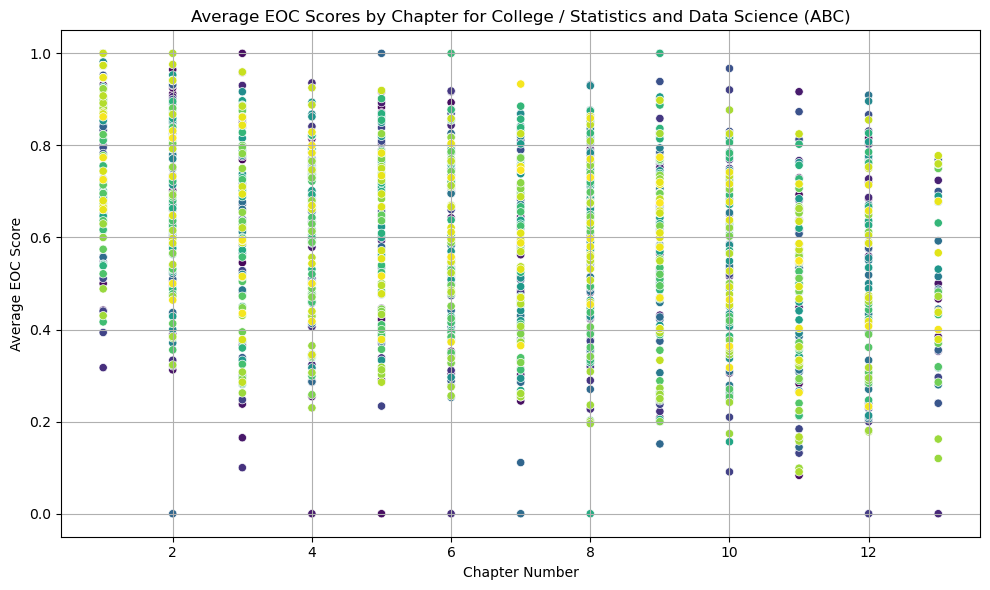

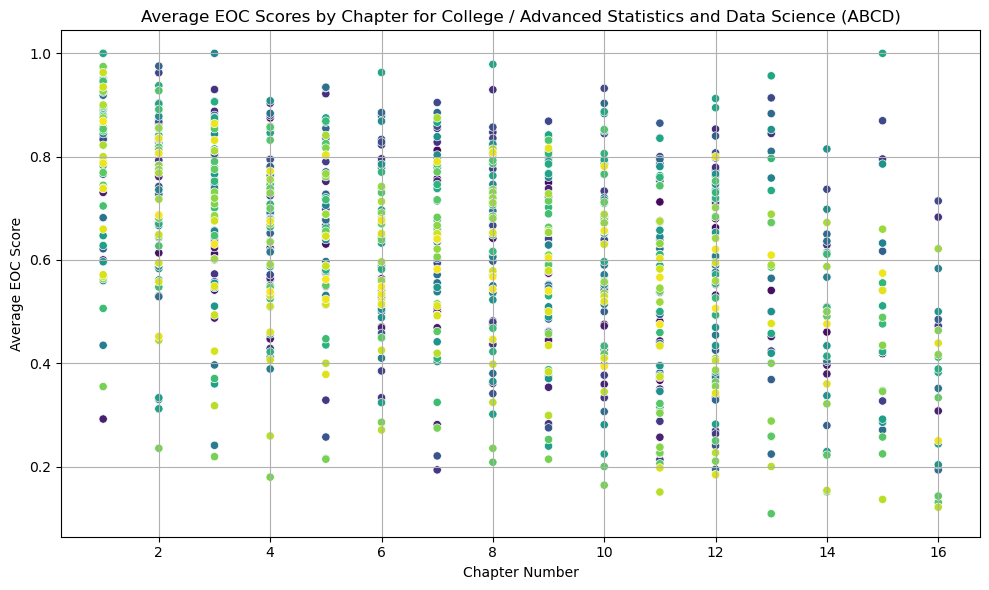

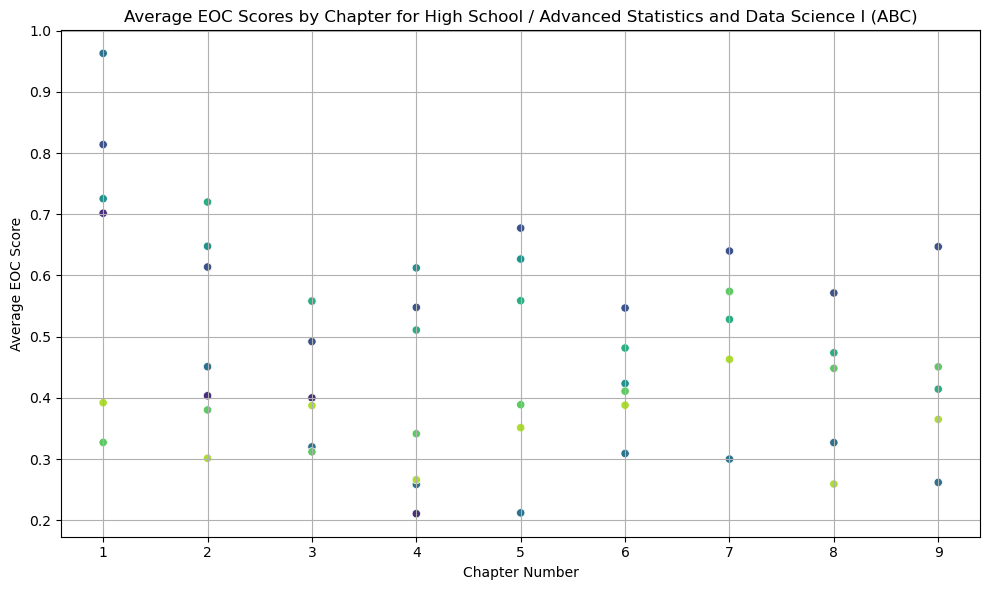

In [15]:
df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')

# Filter the data for each book
df_ABC = df[df['book'] == 'College / Statistics and Data Science (ABC)']
df_ABCD = df[df['book'] == 'College / Advanced Statistics and Data Science (ABCD)']
df_ABC_High = df[df['book'] == 'High School / Advanced Statistics and Data Science I (ABC)']

# Group the data by 'student_id' and 'chapter_number' and calculate the mean of 'EOC' for each book
grouped_data_ABC = df_ABC.groupby(['student_id', 'chapter_number'])['EOC'].mean().reset_index()
grouped_data_ABCD = df_ABCD.groupby(['student_id', 'chapter_number'])['EOC'].mean().reset_index()
grouped_data_ABC_High = df_ABC_High.groupby(['student_id', 'chapter_number'])['EOC'].mean().reset_index()

# Plotting for book 'College / Statistics and Data Science (ABC)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data_ABC, x='chapter_number', y='EOC', hue='student_id', palette='viridis', legend=False)
plt.title('Average EOC Scores by Chapter for College / Statistics and Data Science (ABC)')
plt.xlabel('Chapter Number')
plt.ylabel('Average EOC Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting for book 'College / Advanced Statistics and Data Science (ABCD)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data_ABCD, x='chapter_number', y='EOC', hue='student_id', palette='viridis', legend=False)
plt.title('Average EOC Scores by Chapter for College / Advanced Statistics and Data Science (ABCD)')
plt.xlabel('Chapter Number')
plt.ylabel('Average EOC Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting for book 'High School / Advanced Statistics and Data Science I (ABC)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data_ABC_High, x='chapter_number', y='EOC', hue='student_id', palette='viridis', legend=False)
plt.title('Average EOC Scores by Chapter for High School / Advanced Statistics and Data Science I (ABC)')
plt.xlabel('Chapter Number')
plt.ylabel('Average EOC Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:

df_eoc = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')
df_page_views = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')

# Merge the datasets based on matching 'student_id'
merged_df = pd.merge(df_eoc, df_page_views, on='student_id', how='inner')
merged_df.to_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data.csv', index=False)

df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data.csv')

# Drop the specified columns
columns_to_drop = ["tried_again_dt", "tried_again_clicks", "was_complete", "review_flag", 
                   "class_id_y", "institution_id", "page", "release", "book_y", 
                   "chapter", "chapter_number_y"]
df.drop(columns=columns_to_drop, inplace=True)
print(df.head())


# Split the 'dt_accessed' column into date and time components
df['date'] = pd.to_datetime(df['dt_accessed']).dt.date
df['time'] = pd.to_datetime(df['dt_accessed']).dt.time

# Drop the original 'dt_accessed' column
df.drop(columns=['dt_accessed'], inplace=True)
print(df.head())


/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_57688/2317762432.py:5: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_57688/2317762432.py:15: DtypeWarning:

Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.



                             student_id                            class_id_x  \
0  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
1  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
2  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
3  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   
4  001824fb-a2fd-431d-aef6-7a1250d97a62  074123e7-cd90-4500-86fe-286aaa733bf5   

   chapter_number_x                                       book_x       EOC  \
0                 1  College / Statistics and Data Science (ABC)  0.921053   
1                 1  College / Statistics and Data Science (ABC)  0.921053   
2                 1  College / Statistics and Data Science (ABC)  0.921053   
3                 1  College / Statistics and Data Science (ABC)  0.921053   
4                 1  College / Statistics and Data Science (ABC)  0.921053   

   n_possible  n_correct  n_attempt  section

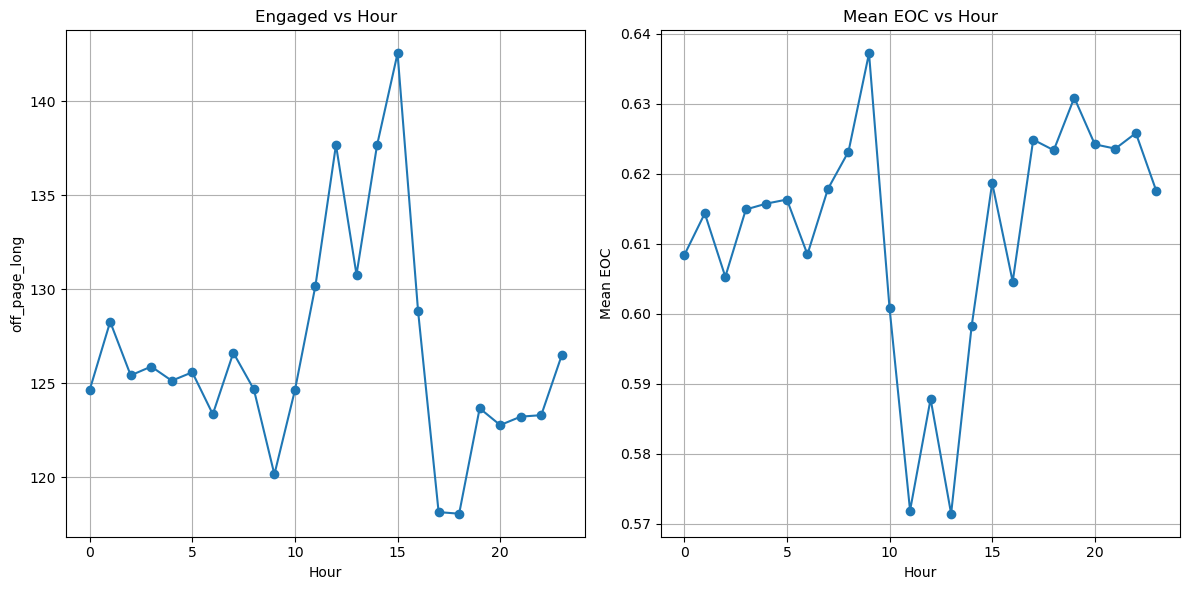

Pearson Correlation Coefficient: -0.5260876288075386


In [28]:
# Group the data by hour and calculate the mean of 'engaged' and 'EOC'
grouped_data = df.groupby('hour')[['n_attempt', 'EOC']].mean()

# Plot 'engaged' vs hour
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(grouped_data.index, grouped_data['n_attempt'], marker='o')
plt.xlabel('Hour')
plt.ylabel('off_page_long')
plt.title('Engaged vs Hour')
plt.grid(True)

# Plot 'EOC' vs hour
plt.subplot(1, 2, 2)
plt.plot(grouped_data.index, grouped_data['EOC'], marker='o')
plt.xlabel('Hour')
plt.ylabel('Mean EOC')
plt.title('Mean EOC vs Hour')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate the Pearson correlation coefficient
correlation = grouped_data['n_attempt'].corr(grouped_data['EOC'])
print("Pearson Correlation Coefficient:", correlation)

In [30]:
df_merge = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')
df_media_views = pd.read_csv('/Users/rujvi/Downloads/full_03_04/checkpoints_eoc.csv')

# Merge the datasets based on matching 'student_id'
merged_ext_df = pd.merge(df_merge, df_media_views, on='student_id', how='inner')

# Save the merged dataset to a new CSV file
merged_ext_df.to_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data_ext2.csv', index=False)


/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_57688/2515824528.py:4: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [29]:
df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data_ext2.csv')

print(df.head())

# Split the 'dt_accessed' column into date and time components
df['date'] = pd.to_datetime(df['dt_accessed']).dt.date
df['time'] = pd.to_datetime(df['dt_accessed']).dt.time

# Drop the original 'dt_accessed' column
df.drop(columns=['dt_accessed'], inplace=True)
print(df.head())



/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/137520273.py:2: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



                                        book_x release  \
0  College / Statistics and Data Science (ABC)    v5.0   
1  College / Statistics and Data Science (ABC)    v5.0   
2  College / Statistics and Data Science (ABC)    v5.0   
3  College / Statistics and Data Science (ABC)    v5.0   
4  College / Statistics and Data Science (ABC)    v5.0   

                                             chapter  \
0  Chapter 1 - Welcome to Statistics: A Modeling ...   
1  Chapter 1 - Welcome to Statistics: A Modeling ...   
2  Chapter 1 - Welcome to Statistics: A Modeling ...   
3  Chapter 1 - Welcome to Statistics: A Modeling ...   
4  Chapter 1 - Welcome to Statistics: A Modeling ...   

                          page  chapter_number_x  section_number  \
0  1.3 Doing Statistics with R               1.0             3.0   
1  1.3 Doing Statistics with R               1.0             3.0   
2  1.3 Doing Statistics with R               1.0             3.0   
3  1.3 Doing Statistics with R            

KeyError: 'dt_accessed'

/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1189/2173824191.py:4: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



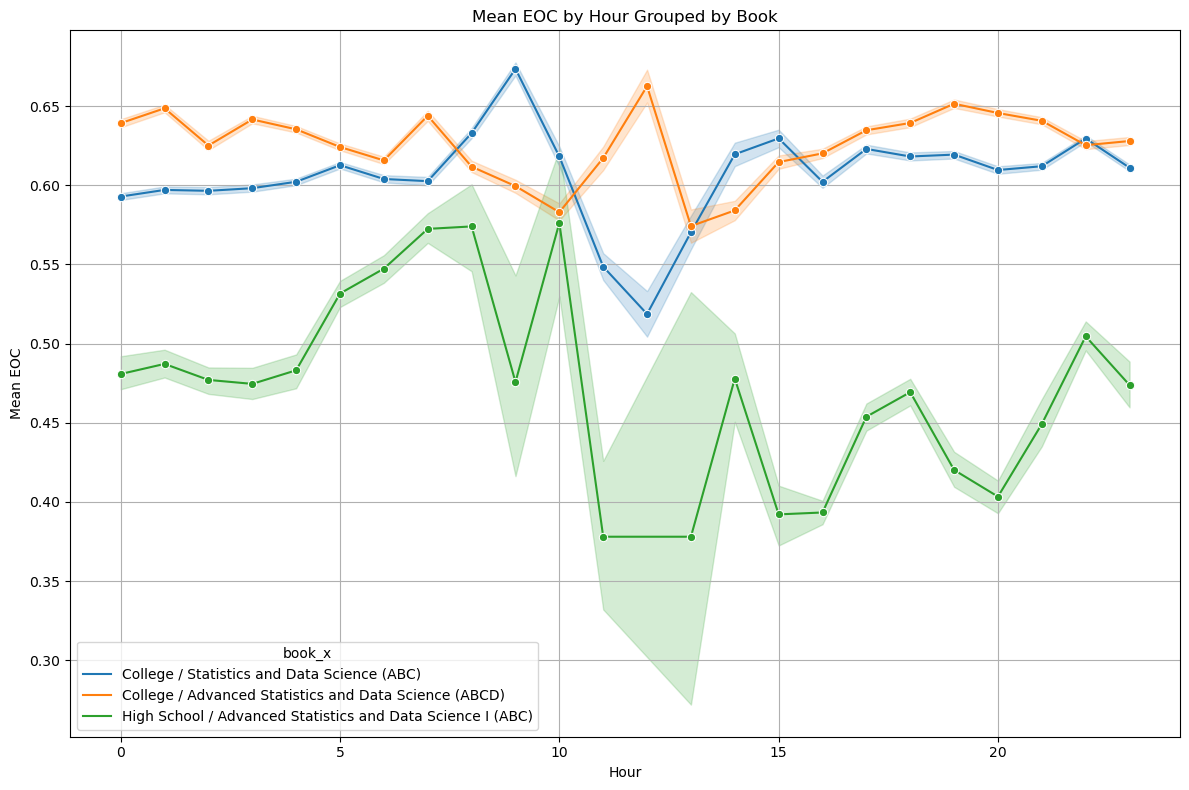

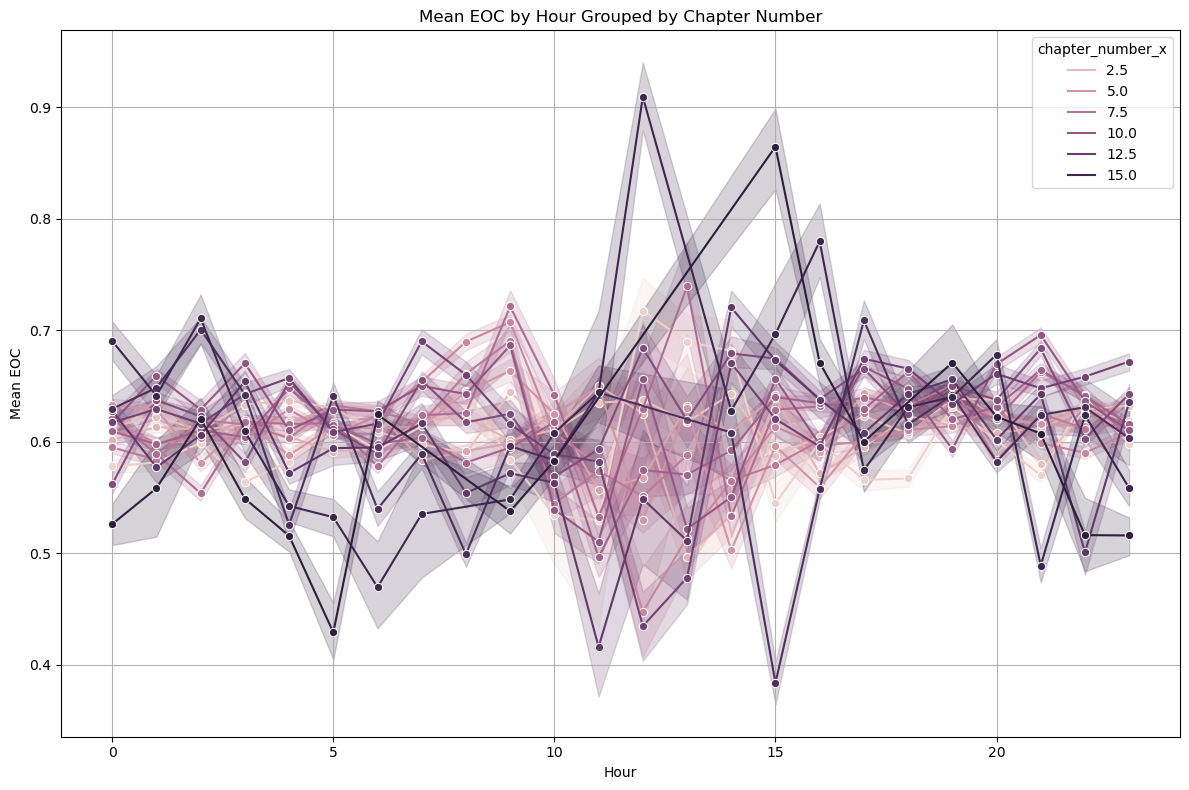

In [30]:
df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data_ext2.csv')


# Split the "dt_accessed" column
df['dt_accessed'] = pd.to_datetime(df['dt_accessed'])
df['hour'] = df['dt_accessed'].dt.hour
df.head()

# Group by hour and calculate the mean of 'EOC'
grouped_data = df.groupby('hour')['EOC'].mean().reset_index()
grouped_data.head()


# Plot the mean EOC by hour grouped by book
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='hour', y='EOC', hue='book_x', marker='o')
plt.xlabel('Hour')
plt.ylabel('Mean EOC')
plt.title('Mean EOC by Hour Grouped by Book')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the mean EOC by hour grouped by chapter_number
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='hour', y='EOC', hue='chapter_number_x', marker='o')
plt.xlabel('Hour')
plt.ylabel('Mean EOC')
plt.title('Mean EOC by Hour Grouped by Chapter Number')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import gradio
print(gradio.__version__)


In [ ]:
import gradio as gr

def process_inputs(chapter_number, n_possible, n_correct, n_attempt, book, page, section_number, was_complete, tried_again_dt, tried_again_clicks):
    return chapter_number, n_possible, n_correct, n_attempt, book, page, section_number, was_complete, tried_again_dt, tried_again_clicks

iface = gr.Interface(fn=process_inputs, 
                     inputs=["number", "number", "number", "number", "text", "number", "number", "text", "text", "number"], 
                     outputs="number", 
                     title="Input Processor",
                     description="Process 10 inputs and output a single number.")
iface.launch()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_eoc = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')
df_page_views = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')

merged_df = pd.merge(df_eoc, df_page_views, on='student_id', how='inner')

merged_df['book'], _ = pd.factorize(merged_df['book'])
merged_df['chapter_number'], _ = pd.factorize(merged_df['chapter_number'])
merged_df['page'], _ = pd.factorize(merged_df['page'])
merged_df['tried_again_dt'], _ = pd.factorize(merged_df['tried_again_dt'])

merged_df = merged_df.dropna(subset=['EOC', 'dt_accessed'])
merged_df.fillna(0, inplace=True)

# Define predictor variables and target variable
X = merged_df.drop(columns=['student_id', 'class_id_x','class_id_y', 'institution_id', 'book','dt_accessed','release','chapter','chapter_number', 'EOC'])
y = merged_df['EOC']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Define a function to predict EOC score
def predict_eoc(chapter_number, n_possible, n_correct, n_attempt, book, page, section_number, was_complete, tried_again_dt, tried_again_clicks):
    input_data = pd.DataFrame({
        'chapter_number': [chapter_number],
        'n_possible': [n_possible],
        'n_correct': [n_correct],
        'n_attempt': [n_attempt],
        'book': [book],
        'page': [page],
        'section_number': [section_number],
        'was_complete': [was_complete],
        'tried_again_dt': [tried_again_dt],
        'tried_again_clicks': [tried_again_clicks]
    })
    # Predict the EOC score using the trained model
    predicted_eoc = model.predict(input_data)[0]
    return predicted_eoc

# Define inputs
inputs = [
    gr.inputs.Number(label="Chapter Number"),
    gr.inputs.Number(label="Number of Possible Answers"),
    gr.inputs.Number(label="Number of Correct Answers"),
    gr.inputs.Number(label="Number of Attempts"),
    gr.inputs.Dropdown(label="Book", choices=list(df_eoc['book'].unique())),
    gr.inputs.Number(label="Page"),
    gr.inputs.Number(label="Section Number"),
    gr.inputs.Textbox(label="Was Complete"),
    gr.inputs.Textbox(label="Tried Again DT"),
    gr.inputs.Number(label="Tried Again Clicks")
]

# Create the Gradio interface
iface = gr.Interface(fn=predict_eoc, 
                     inputs=inputs,
                     outputs=gr.outputs.Number(label="Predicted EOC Score"),
                     title="EOC Score Predictor",
                     description="Predict the EOC score based on input features using linear regression model.")
iface.launch()


In [ ]:
df_eoc.head()
